## <span style="color:blue">Problem statment

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.

The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to answer the questions provided below


## <span style="color:blue">Data Description

The job bulletins will be provided as a folder of plain-text files, one for each job classification.

Job Bulletins: 683 plain-text job postings

Instructions and Additional Documents:

- Job Bulletins with Annotations

- Annotation Descriptions.docx

- City Job Paths

- PDFs

- Description of promotions in job bulletins.docx

- Job_titles.csv

- Kaggle_data_dictionary.csv


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- FILE_NAME: The bulletins file name.
- JOB_CLASS_TITLE: Job title.
- JOB_CLASS_NO: Job number.
- JOB_DUTIES: The duties of this job.
- EDUCATION_YEARS: Number of education yeras needed to apply for this job.
- SCHOOL_TYPE: The type of school you need to study in.
- EDUCATION_MAJOR: The eductaion major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job .
- FULL_TIME_PART_TIME: If the job is full time or part time or both.
- EXP_JOB_CLASS_TITLE: The title of the job you must have experience in before applying in this job.
- COURSE_COUNT: Number of courses neede to apply for this job.
- COURSE_LENGTH: The course length in years or months.
- COURSE_SUBJECT: The course subject tha is needed to be accepted in this job.
- DRIVERS_LICENSE_REQ: Is driver license required or not for this job.
- EXAM_TYPE: Type of exams neededin the hiring process.
- ENTRY_SALARY: Salary range in this job.
- OPEN_DATE: Date at it the job bulliten got open.
- REQUIREMENT_SET_TEXT: The requirments set need for this job in points.

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
def get_job_title(text_data):
    title_match = re.search("([\s\S]*?)(Class|EXEMPT EMPLOYMENT OPPORTUNITY)", text_data)
    try:
        job_title = title_match.group(1).strip().upper()
    except:
        job_title = None
    return job_title
def get_annual_salary(text_data):
    salary=re.search("ANNUAL\s+SALARY\s+(.*)",text_data)
    if salary:
        return salary.group(1).strip()
    else:
        salary=re.search("ANNUALSALARY\s+(.*)",text_data)
        if salary:
            return salary.group(1).strip()
        else:
            return None


def get_open_date(text_data):
    data=re.search("(\d\d-\d\d-\d\d)[\s\S]*ANNUAL",text_data)
    if data:
        return data.group(1)
    else:
        data = re.search("(\d-\d\d-\d\d)[\s\S]*ANNUAL", text_data)
        if data:
            return data.group(1)
        else:
            data = re.search("DATE:\s+(.*)\s", text_data)
            if data:
                return data.group(1)
            else:
                return None

def get_class_code(text_data):
    class_match = re.search("Class Code:\s+(\d+)\s", text_data)
    try:
        class_code = class_match.group(1)
    except:
        class_code = None
    return class_code

def get_job_duties(text_data):
    duties_match = re.search("(DUTIES|DUTY)\s+(.*)", text_data,re.DOTALL|re.IGNORECASE)
    try:
        duties = duties_match.group(2).strip()
        duties= ' '.join(duties.splitlines())
    except:
        duties = None
    return duties



def get_exam_type(text_data): #    type=re.search("(THIS EXAMINATION|EXAMINATION)(.*\s.*)",text_data)
    type = re.search(f"(THIS EXAMINATION|EXAMINATION)[\s\S]*(PROMOTIONAL AND OPEN|PROMOTIONAL AND AN OPEN)",text_data,re.DOTALL | re.IGNORECASE)
    if type:
        return "BOTH AN INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS"
    else:
        type = re.search("(THIS EXAMINATION|EXAMINATION)[\s\S]*(COMPETITIVE BASIS|COMPETITVE)", text_data,re.DOTALL|re.IGNORECASE)
        if type:
            return "ONLY ON AN OPEN COMPETITIVE BASIS"
        else:
            type = re.search(f"(THIS EXAMINATION|EXAMINATION)[\s\S]*(INTERDEPARTMENTAL|DEPARTMENTAL|INTERDEPARMENTAL)", text_data,re.DOTALL | re.IGNORECASE)
            if type:
                return "ONLY ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS"
            else:
                return None


requirements_tag='|'.join(["REQUIREMENT/MIMINUMUM QUALIFICATION",
                  "REQUIREMENT/MINUMUM QUALIFICATION",
                  "REQUIREMENT/MINIMUM QUALIFICATION",
                  "REQUIREMENT/MINIMUM QUALIFICATIONS",
                  "REQUIREMENT/ MINIMUM QUALIFICATION",
                  "REQUIREMENTS/MINUMUM QUALIFICATIONS",
                  "REQUIREMENTS/ MINIMUM QUALIFICATIONS",
                  "REQUIREMENTS/MINIMUM QUALIFICATIONS",
                  "REQUIREMENTS/MINIMUM REQUIREMENTS",
                  "REQUIREMENTS/MINIMUM QUALIFCATIONS",
                   "REQUIREMENT/MINIMUM QUALIFICAITON",
                  "MINIMUM REQUIREMENTS:",
                  "REQUIREMENTS",
                  "REQUIREMENT"])

def get_reqs(text_data):
    reqs=re.search(f"({requirements_tag})\s+([\s\S]*?)(PROCESS NOTES|PROCESS NOTE|NOTE)",text_data,re.DOTALL|re.IGNORECASE)
    if reqs:
         reqs=reqs.group(2)
         reqs=' '.join(reqs.splitlines())
         return reqs
    else:
        return None
school = "college or university|university or college|high school|college|" \
         "apprenticeship|university|school"
license_str="licensed|LICENSED|license|LICENSE"
def get_license(text_data):
    license=re.search(f"{license_str}",text_data,re.DOTALL|re.IGNORECASE)
    if license:
        return "R"
    else:
        return "NR"

def get_education(text_data):
    educations=re.search(f"{school}",text_data,re.DOTALL|re.IGNORECASE)
    if educations:
        education=educations.group(0).upper()
    else:
        educations=re.search("(diploma|bachelor|master|phd)",text_data,re.DOTALL|re.IGNORECASE)
        if educations:
            education=educations.group(0).upper()
        else:
            education= None
    return education
part_or_full='part-time or full-time|full-time or part-time|part or full|full or part|part-time|full-time|PART-TIME|FULL-TIME|fulltime|parttime|full time|part time'
def get_part_or_full_time(text_data):
    jobtype=re.search(f"{part_or_full}",text_data,re.DOTALL|re.IGNORECASE)
    if jobtype:
        return jobtype.group(0).upper()
    else:
        return None
numbers='one|One|two|Two|three|Three|four|Four|five|Five|six|Six|seven|Seven|eight|Eight|nine|Nine'
def get_experience(requirements_data):
    exp=re.search(f"({numbers})\s(years|year).*\s(full-time|part-time)",requirements_data,re.DOTALL|re.IGNORECASE|re.I)
    if exp:
        exp=exp.group(1).upper()
        number = get_number(exp)
        return number
    else:
        exp = re.search(f"(full-time|part-time).*?({numbers})\s(years|year)", requirements_data,re.DOTALL | re.IGNORECASE)
        if exp:
            exp=exp.group(2).upper()
            number = get_number(exp)
            return number
        else:
            exp = re.search(f"({part_or_full})[\s\S]*?({numbers})", requirements_data,re.DOTALL | re.IGNORECASE)
            if exp:
                exp=exp.group(2).upper()
                number = get_number(exp)
                return number
            else:
                return None

#

def get_education_years(requirements_data):
    years = re.search(f"({numbers})[/s-]year.*?({school})", requirements_data,re.DOTALL|re.IGNORECASE)
    if years:
        years=years.groups(1)[0].upper()
        number = get_number(years)
        return number
    else:
        years = re.search(f"({numbers})[/s-]year[\s\S]*?({school})", requirements_data, re.DOTALL | re.IGNORECASE )
        if years:
            years=years.groups(1)[0].upper()
            number = get_number(years)
            return number
        else:
            years = re.search(f"({requirements_tag})[\s\S]*({numbers})\s+(years|year)[\s\S]*?({school})", requirements_data,re.DOTALL | re.IGNORECASE)
            if years:
                years=years.groups(2)[1].upper()
                number = get_number(years)
                return number
            else:
                return None

education_majors='|'.join(["Agribusiness Operations","Airport Guide","computer engineering","Airport","Agricultural Business","Agricultural Economics","carpet layer","Agricultural Mechanization","Agricultural Production","Agronomy & Crop Science","Agriculture","Animal Sciences","Food Sciences ","Horticulture Operations & Management","Horticulture Science","Natural Resources Conservation","Environmental Science","Forestry","Natural Resources Management","Wildlife & Wildlands Management","Architecture","Architectural Environmental Design","Regional Planning","Interior Architecture","Landscape Architecture","African American Studies","Women’s Studies","Liberal Arts","General Studies","Library Science","Interdisciplinary","Art History","Criticism","Studio Arts"," Art ","Cinematography","Video Production","Dancing","Design & Visual Communications","Fashion","Apparel Design","Graphic Design","Industrial Design","Interior Design","Music","Photography","Theatre Arts","Drama","Accounting Technician","Accounting","Business Administration & Management","Hotel Management","Human Resources Management","Human Resources ","International Business Management","Labor","Industrial Relations","Logistics & Materials Management","Marketing Management & Research","Office Supervision & Management","Operations Management & Supervision","Organizational Behavior","Contracts Management","Food Services Management","Small Business Management/Operations","Tourism Management",
                           "Actuarial Science","auto body and fender repairer","auto body builder","body builder","Business","Managerial Economics","Finance","Banking & Financial Support Services","Financial Planning & Services","Insurance & Risk Management","Investments & Securities","Management Information Systems","Real Estate","Sales","Merchandising","Marketing","Fashion Merchandising","Tourism & Travel Marketing","Secretarial Studies & Office Administration","Communications","Advertising","Digital Communications","Media","Journalism","Mass Communications","Public Relations & Organizational Communication","Radio & Television Broadcasting","Communications","Graphic & Printing Equipment Operation","Multimedia","Animation","Special Effects","Radio & Television Broadcasting","Family & Consumer Sciences","Adult Development & Aging/Gerontology","Child Care Services Management","Child Development","Consumer & Family Economics","Food & Nutrition","Textile & Apparel","Parks, Recreation, & Leisure","Exercise Science","Physiology","Kinesiology","Physical Education","Fitness","Administration Management","Personal Services","Cosmetology","Culinary Arts","Chef Training","Funeral Services & Mortuary Science","Protective Services","Corrections","Criminal Justice","Fire Protection & Safety","Law Enforcement","Military Technologies","Public Administration & Services","Community Organization & Advocacy","Public Administration","Public Affairs & Public Policy Analysis","Social Work","COMPUTER SCIENCE",
                    "Geographical Information Systems","Information System","MATHEMATICS","Computer & Information Sciences","Computer Networking","Telecommunications","Computer Programming","Computer Software & Media Applications","Computer System Administration","Data Management","Information Science","Webpage Design","Mathematics","Applied Mathematics","Statistics","Counseling & Student Services","Educational Administration","Special Education","Teacher Education","Curriculum","Early Childhood Education","Elementary Education","Junior High/Middle School Education","Postsecondary Education","Secondary Education","Teacher Assisting","Aide Education","Teacher Education, Subject-Specific","Agricultural Education","Art Education","Business Education","Technical Education","English-as-a-Second-Language Education","English/Language Arts Education","Foreign Languages Education","Health Education","Mathematics Education","Music Education","Physical Education","Science Education","Social Studies","Sciences Education","Aerospace Engineering","Aeronautical Engineering","Agricultural/Bioengineering","Architectural Engineering","Biomedical Engineering","Chemical Engineering","Civil Engineering","Computer Engineering","Construction Engineering/Management","Electrical, Electronics & Communications Engineering","Environmental Health Engineering","Industrial Engineering","Mechanical Engineering","Nuclear Engineering","ENGINEERING TECHNOLOGY & DRAFTING",
                           "Architectural Drafting","Mechanical Drafting","Engineering","engineering","Drafting","Aeronautical/Aerospace Engineering Technologies","Architectural Engineering","Automotive Engineering","Civil Engineering","Computer Engineering","Construction","Engineering","Electrical Engineering","Electronics Engineering","Electromechanical Engineering","Electromechanical ","Biomedical Engineering","Environmental Control","Industrial Production Technologies","Mechanical Engineering","Quality Control & Safety Technologies","Surveying","English Language ","American/English Literature","Creative Writing","Public Speaking","Foreign Languages","Asian Languages ","Ancient Languages ","Literatures","Comparative Literature","French Language & Literature","German Language & Literature","Linguistics","Middle Eastern Languages & Literatures","Spanish Language & Literature","HEALTH ADMINISTRATION & ASSISTING","Health Services Administration","Facilities Administration","Medical Office","Secretarial","Medical Records","Medical Clinical Assisting","Dental Assisting","Medical Assisting","Occupational Therapy Assisting","Physical Therapy Assisting","Veterinarian Assisting","HEALTH SCIENCES & TECHNOLOGIES","Chiropractic","Dental Hygiene","Dentistry","Emergency Medical","Health-Related Professions & Services","Athletic Training","Public Health","Medical Laboratory","Medical Radiologic","Nuclear Medicine","Respiratory Therapy","Building and Safety","Safety and Health",
                           "Surgical","Medicine","Nursing, Practical","Nursing, Registered","Pharmacy ","Physician Assisting","Therapy & Rehabilitation","Alcohol/Drug Abuse Counseling","Massage Therapy","Mental Health Counseling","Occupational Therapy","Physical Therapy ","Psychiatric","Mental Health Technician","Rehabilitation Therapy","Vocational Rehabilitation Counseling","Veterinary Medicine","PHILOSOPHY","Theology","Biblical Studies","Divinity","Ministry","Marketing","refrigeration and air conditioning","refrigeration","air conditioning","Religious Education","Aviation & Airway Science","Aircraft Piloting & Navigation","Aviation Management & Operations","Construction Trades","Mechanics & Repairers","Aircraft Mechanics/Technology","Autobody Repair/Technology","Automotive Mechanics/Technology","Avionics","Diesel Mechanics","Electrical/Electronics Equip Installation & Repair","Precision Production Trades","Machine Tool","Welding","Biology","Biochemistry & Biophysics","Cellular Biology","Ecology","Genetics","Marine/Aquatic Biology","Microbiology & Immunology","Zoology","Physical Sciences","Astronomy","Atmospheric Sciences & Meteorology","Chemistry","Geological & Earth Sciences","Physics","SOCIAL SCIENCES & LAW","Legal Studies","Court Reporting"," Law ","Legal Administrative Assisting/Secretarial","Paralegal/Legal Assistant","Social Sciences","Anthropology","Criminology","Economics","Geography","History","International Relations & Affairs","Political Science & Government","Clinical & Counseling","Psychology","Sociology","Science","Accounting","acounting","engineering","Maintenance"])
def get_major(text_data):
    major=re.search(f"(major in |as a ).*?({education_majors})",text_data,re.DOTALL|re.IGNORECASE|re.I)   #,"Safety"
    if major:
        return major.group(2).upper()
    else:
        major = re.search(f"({school})[\s\S]*?({education_majors})", text_data,re.DOTALL | re.IGNORECASE)
        if major:
            return major.group(2).upper()
        else:
            major = re.search(f"({education_majors})",text_data, re.DOTALL | re.IGNORECASE)
            if major:
                return major.group(1).upper()
            else:
                return None



def get_course_counts(text_data):
    counts=re.search(f"({numbers})( courses| course|courses|course|-courses|-course)",text_data,re.DOTALL|re.IGNORECASE|re.I)
    if counts:
        counts=counts.group(1).upper()
        number = get_number(counts)
        return number
    else:
        counts=len(re.findall("( course )",text_data,re.DOTALL|re.IGNORECASE|re.I))
        return counts

def get_course_length(text_data,count):
    if count!=0:
        length=re.search(f"( courses| course|courses|course|-courses|-course).*?({numbers})",text_data,re.DOTALL|re.IGNORECASE|re.I)
        if length:
            length=length.groups(2)[1].upper()
            number=get_number(length)
            return number
        else:
            return None
    else:
        return 0
jobs1='|'.join(["Occupations","Accountant","Accounts Assistant","Accounts Clerk","Accounts Manager","Senior Management Analyst","Senior Management","Data Analysis","Data Scientist",
       "Accounts Staff","Acoustic Engineer"," Actor ","Actress","Actuary","Acupuncturist","finance management","Electrical Mechanic","Electrical Helper","helper in an electrical","electric services",
        "Electrical Craft Helper","Electrical Craft","electrical work","electric services","repair of auto bodies",
       "Adjustor","Administration Assistant","Administration Clerk","Administration Manager","cement finisher helper",
       "Administration Staff","Administrator","Advertising Agent","Advertising Assistant","Advertising Clerk","Advertising Contractor",
       "Advertising Executive","Advertising Manager","Advertising Staff","Aerial Erector","Aerobic Instructor","Aeronautical Engineer",
       "Agent","Air Traffic Controller","Aircraft Designer","Aircraft Engineer","Aircraft Maintenance Engineer","Maintenance Engineer","Aircraft Surface Finisher",
       "Airman","Airport Controller","Airport Manager","Almoner","Ambulance Controller","Ambulance Crew","Ambulance Driver","Amusement Arcade Worker","Anaesthetist",
       "Analyst","Analytical Chemist","Animal Breeder","Anthropologist","Antique Dealer","Applications Engineer","Applications Programmer","Arbitrator","Arborist","Archaeologist","Architect","Archivist","Area Manager","Armourer","Aromatherapist","Art Critic","Art Dealer","Art Historian","Art Restorer","Artexer","Artist"," Arts ","Assembly Worker","Assessor","Assistant","Assistant Caretaker","Assistant Cook","Assistant Manager","Assistant Nurse","Assistant Teacher","Astrologer","Astronomer","Attendant","Au Pair","Auction Worker","Auctioneer","Audiologist","Audit Clerk","Audit Manager","Auditor","Auto Electrician","Auxiliary Nurse","Bacon Curer","Baggage Handler","Bailiff","Baker","Bakery Assistant","Bakery Manager","Bakery Operator","Balloonist","Bank Clerk","Bank Manager","Bank Messenger","Baptist Minister","Bar Manager","Bar Steward","Barber","Barmaid","Barman","Barrister","Beautician","Beauty Therapist","Betting Shop","Bill Poster","Bingo Caller","Biochemist","Biologist","Blacksmith","Blind Assembler","Blind Fitter","Blinds Installer","Boat Builder","Body Fitter","Bodyguard","Bodyshop","Book Binder","Book Seller","Book-Keeper","Booking Agent","Booking Clerk","Bookmaker","Botanist","Branch Manager","Breeder","Brewer","Brewery Manager","Brewery Worker","Bricklayer","Broadcaster","Builder","Builders Labourer","Building Advisor","Building Control","Building Engineer","Building Estimator","Building Foreman","Building Inspector","Building Manager","Building Surveyor","Bursar","Bus Company","Bus Conductor","Bus Driver","Bus Mechanic","Bus Valeter","Business Consultant","Business Proprietor","Butcher","Butchery Manager","Butler","Buyer","Cab Driver","Cabinet Maker","Cable Contractor","Cable Jointer","Cable TV Installer","Cafe Owner","Cafe Staff","Cafe Worker","Calibration Manager","Camera Repairer","Cameraman","Car Dealer","Car Delivery Driver","Car Park Attendant","Car Salesman","Car Valet","Car Wash Attendant","Care Assistant","Care Manager","Careers Advisor","Careers Officer","Caretaker","Cargo Operator","Carpenter","Carpet Cleaner","Carpet Fitter","Carpet Retailer","Carphone Fitter","Cartographer","Cartoonist","Cashier","Casual Worker","Caterer","Catering Consultant","Catering Manager","Catering Staff","Caulker","Ceiling Contractor","Ceiling Fixer","Cellarman","Chambermaid","Chandler","Chaplain","Charge Hand","Charity Worker","Chartered","Chartered Accountant","Chauffeur","Chef","Chemist","Chicken Chaser","Child Minder","Childminder","Chimney Sweep","China Restorer","Chiropodist","Chiropractor","Choreographer","Church Officer","Church Warden","Cinema Manager","Circus Proprietor","Circus Worker","Civil Engineer","Civil Servant","Claims Adjustor","Claims Assessor","Claims Manager","Clairvoyant","Classroom Aide","Cleaner","Clergyman"," Cleric ","Commissioned","Consultant","Coroner","Councillor","Counsellor","Dealer","Decorator","Delivery Driver","Doctor","Car Driver","Economist","Editor","Engineer","English Teacher","Entertainer","Envoy","Executive","Farmer","Fireman","Floor Layer","Floor Manager","Florist","Flour Miller","Flower Arranger","Flying Instructor","Foam Convertor","Food Processor","Footballer","Foreman","Forensic Scientist","Forest Ranger","Forester","Fork Lift Truck Driver","Forwarding Agent","Foster Parent","Foundry Worker","Fraud Investigator","French Polisher","Fruiterer","Fuel Merchant","Fund Raiser","Funeral Director","Funeral Furnisher","Furnace Man","Furniture Dealer","Furniture Remover","Furniture Restorer","Furrier","Gallery Owner","Gambler","Gamekeeper","Gaming Board Inspector","Gaming Club Manager","Gaming Club Proprietor","Garage Attendant","Garage Foreman","Garage Manager","Garda","Garden Designer","Gardener","Gas Fitter","Gas Mechanic","Gas Technician","Gate Keeper",
                "Genealogist","General Practitioner","Geologist","Geophysicist","Gilder","Glass Worker","Glazier","Goldsmith","Golf Caddy","Golf Club Professional","Golfer","Goods Handler","Governor","Granite Technician","Graphic Designer","Graphologist","Grave Digger","Gravel Merchant","Green Keeper","Greengrocer","Grocer","Groom","Ground Worker","Groundsman","Guest House Owner","Guest House Proprietor","Gun Smith","Gynaecologist","HGV Driver","HGV Mechanic","Hairdresser","Handyman","Hardware Dealer","Haulage Contractor","Hawker","Health Advisor","Health And Safety","Health Care Assistant","Health Consultant","Health Nurse","Health Planner","Health Service","Health Therapist","Health Visitor","Hearing Therapist","Heating Engineer","Herbalist","Highway Inspector","Hire Car Driver","Historian","History Teacher","Hod Carrier","Home Economist","Home Help","Homecare Manager","Homeopath","Homeworker","Hop Merchant","Horse Breeder","Horse Dealer","Horse Riding Instructor","Horse Trader","Horse Trainer","Horticultural Consultant","Horticulturalist","Hosiery Mechanic","Hosiery Worker","Hospital Consultant","Hospital Doctor","Hospital Manager","Hospital Orderly","Hospital Technician","Hospital Warden","Hospital Worker","Hostess","Hot Foil Printer","Hotel Consultant","Hotel Worker","Hotelier","Househusband","Housekeeper","Housewife","Housing Assistant","Housing Officer","Housing Supervisor","Hygienist","Hypnotherapist","Hypnotist","IT Consultant","IT Manager","IT Trainer","Ice Cream Vendor","Illustrator","Immigration Officer","Import Consultant","Importer","Independent Means","Induction Moulder","Industrial Chemist","Industrial Consultant","Injection Moulder","Inspector","Instructor","Instrument Engineer","Instrument Maker","Instrument Supervisor","Instrument Technician","Insurance Agent","Insurance Assessor","Insurance Broker","Insurance Consultant","Insurance Inspector","Insurance Staff","Interior Decorator","Interior Designer","Interpreter","Interviewer","Inventor","Investigator","Investment Advisor","Investment Banker","Investment Manager","Investment Strategist","Ironmonger","Janitor","Jazz Composer","Jeweller","Jewellery","Jockey","Joiner","Joinery Consultant","Journalist","Judge","Keep Fit Instructor","Kennel Hand","Kitchen Worker","Knitter","Labelling Operator","Laboratory Analyst","Labourer","Laminator","Lampshade Maker","Land Agent","Land Surveyor","Landlady","Landlord","Landowner","Landworker","Lathe Operator","Laundry Staff","Laundry Worker","Lavatory Attendant","Law Clerk","Lawn Mower","Lawyer","Leaflet Distributor","Leather Worker","Lecturer","Ledger Clerk","Legal Advisor","Legal Assistant","Legal Executive","Legal Secretary","Letting Agent","Liaison Officer","Librarian","Library Manager","Licensed Premises","Licensee","Licensing","Lifeguard","Lift Attendant","Lift Engineer","Lighterman","Lighthouse Keeper","Lighting Designer","Lighting Technician","Lime Kiln Attendant","Line Manager","Line Worker","Lineman","Linguist","Literary Agent","Literary Editor","Lithographer","Litigation Manager","Loans Manager","Local Government","Lock Keeper","Locksmith","Locum Pharmacist","Log Merchant","Lorry Driver","Loss Adjustor","Loss Assessor","Lumberjack","Machine Fitters","Machine Minder","Machine Operator","Machine Setter","Machine Tool","Machine Tool Fitter","Machinist","Relations Management","financial management","Magician","Magistrate","Magistrates Clerk","Maid","Maintenance Fitter","Make Up Artist","Manicurist","Manufacturing","Map Mounter","Marble Finisher","Marble Mason","Marine Broker","Marine Consultant","Marine Electrician","Marine Engineer","Marine Geologist","Marine Pilot","Marine Surveyor","Market Gardener","Market Research","Market Researcher","Market Trader","Marketing Agent","Marketing Assistant","Marketing Coordinator","Marketing Director","Marketing Manager","Marquee Erector","Massage Therapist","Masseur","Masseuse","Master Mariner","Materials Controller","Materials Manager","Mathematician","Maths Teacher","Matron","Mattress Maker","Management Assistant","Management","Meat Inspector","Meat Wholesaler","Mechanic","Medal Dealer","Medical Advisor","Medical Assistant","Medical Consultant","Medical Officer","Medical Physicist","Medical Practitioner","Medical Researcher","Medical Secretary","Medical Student","Medical Supplier","Medical Technician","Merchandiser","Merchant","Merchant Banker","Merchant Seaman","Messenger","Metal Dealer","Metal Engineer","Metal Polisher","Metal Worker","Metallurgist","Meteorologist",
       "Meter Reader","Microbiologist","Midwife","Military Leader","Milklady","Milkman","Mill Operator","Mill Worker","Miller","Milliner","Millwright","Miner","Mineralologist","Minibus Driver","Minicab Driver","Mining Consultant","Mining Engineer","Money Broker","Moneylender","Mooring Contractor","Mortgage Broker","Mortician","Motor Dealer","Motor Engineer","Motor Fitter","Motor Mechanic","Motor Racing","Motor Trader","Museum Assistant","Museum Attendant","Music Teacher","Musician","Nanny","Navigator","Negotiator","Neurologist","Newsagent","Night Porter","Night Watchman","Nuclear Scientist","Nun","Nurse","Nursery Assistant","Nursery Nurse","Nursery Worker","Nurseryman","Nursing Assistant","Nursing Auxiliary","Nursing Manager","Nursing Sister","Nutritionist","Off Shore","Office Manager","Office Worker","Oil Broker","Oil Rig Crew","Opera Singer","Operative","Optical","Optical Advisor","Optical Assistant","Optician","Optometrist","Orchestral","Organiser","Organist","Ornamental","Ornithologist","Orthopaedic","Orthoptist","Osteopath","Outdoor Pursuits","Outreach Worker","Packaging","Packer","Paediatrician","Paint Consultant","Painter","Palaeobotanist","Palaeontologist","Pallet Maker","Panel Beater","Paramedic","Park Attendant","Park Keeper","Park Ranger","Partition Erector","Parts Man","Parts Manager","Parts Supervisor","Party Planner",
       "Pasteuriser","Pastry Chef","Patent Agent","Patent Attorney","Pathologist","Patrolman","Pattern Cutter","Pattern Maker","Pattern Weaver","Pawnbroker","Payroll Assistant","Payroll Clerk","Payroll Manager","Payroll Supervisor","Personnel Officer","Pest Controller","Pet Minder","Pharmacist","Philatelist","Photographer","Physician","Physicist","Physiologist","Physiotherapist","Piano Teacher","Piano Tuner","Picture Editor","Picture Framer","Picture Reseacher","Pig Man","Pig Manager","Pilot","Pipe Fitter","Pipe Inspector","Pipe Insulator","Pipe Layer","Planning Engineer","Planning Manager","Planning Officer","Planning Technician","Plant Attendant","Plant Driver","Plant Engineer","Plant Fitter","Plant Manager","Plant Operator","Plasterer","Plastics Consultant","Plastics Engineer","Plate Layer","Plater","Playgroup Assistant","Playgroup Leader","Plumber","Podiatrist","Police Officer","Polisher","Pool Attendant","Pools Collector","Porter","Portfolio Manager","Post Sorter","Postman","Postmaster","Postwoman","Potter","Practice Manager","Preacher","Precision Engineer","Premises","Premises Security","Press Officer","Press Operator","Press Setter","Presser","Priest","Print Finisher","Printer","Prison Chaplain","Prison Officer","Private Investigator","Probation Officer","Probation Worker","Procurator Fiscal","Produce Supervisor","Producer","Product Installer","Product Manager","Production Engineer","Production Hand","Production Manager","Production Planner","Professional Boxer","Professional Racing","Professional Wrestler","Progress Chaser","Progress Clerk","Project Co-ordinator","Project Engineer","Project Leader","Project Manager","Project Worker","Projectionist","Promoter","Proof Reader","Property Buyer","Property Dealer","Property Developer","Property Manager","Property Valuer","Proprietor","Psychiatrist","Psychoanalyst","Psychologist","Psychotherapist","Public House Manager","Public Relations Of?cer","Publican","Publicity Manager","Publisher","Publishing Manager","Purchase Clerk","Purchase Ledger Clerk","Purchasing Assistant","Purchasing Manager","Purser","Quality Controller","Quality Engineer","Quality Inspector","Quality Manager","Quality Technician","Quantity Surveyor","Quarry Worker","Racehorse Groom","Racing Organiser","Radio Controller","Radio Director","Radio Engineer","Radio Operator","Radio Presenter","Radio Producer","Radiographer","Radiologist","Rally Driver","Receptionist","Recorder","Records Supervisor","Recovery Vehicle Coordinator","Recreational","Recruitment Consultant","Rector","Reflexologist","Refractory Engineer","Refrigeration Engineer","Refuse Collector","Registrar","Regulator","Relocation Agent","Remedial Therapist",
       "Rent Collector","Rent Offcer","Repair Man","Repairer","Reporter","Representative","Reprographic Assistant","Research Analyst","Research Consultant","Research Director","Research Scientist","Research Technician","Researcher","Resin Caster","Restaurant Manager","Restaurateur","Restorer","Retired","Revenue Clerk","Revenue Officer","Riding Instructor","Rig Worker","Rigger","Riveter","Road Safety Officer","Road Sweeper","Road Worker","Roadworker","Roof Tiler","Roofer","Rose Grower","Royal Marine","Rug Maker","Saddler","Safety Officer","Sail Maker","Sales Administrator","Sales Assistant","Sales Director","Sales Engineer","Sales Executive","Sales Manager","Sales Representative","Sales Support","Salesman","Saleswoman","Sand Blaster","Saw Miller","Scaffolder","School Crossing","School Inspector","Scientific Officer","Scientist","Scrap Dealer","Screen Printer","Screen Writer","Script Writer","Sculptor","Seaman","Seamstress","Secretary","Security Consultant","Security Controller","Security Guard","Security Officer","Servant","Service Engineer","Service Manager","Share Dealer","Sheet Metal Worker","Shelf Filler","Shelter Warden","Shepherd","Sheriff","Sheriff Clerk","Sheriff Principal","Shift Controller","Ship Broker","Ship Builder","Shipping Clerk","Shipping Officer","Shipwright","Shipyard Worker","Shoe Maker","Shoe Repairer","Shooting Instructor","Shop Assistant","Shop Fitter","Shop Keeper","Shop Manager","Shop Proprietor","Shot Blaster","Show Jumper","Showman","Shunter","Sign Maker","Signalman","Signwriter","Site Agent","Site Engineer","Skipper","Slater","Slaughterman","Smallholder","Social Worker","Software Consultant","Software Engineer","Soldier","Solicitor","Song Writer","Sound Artist","Sound Engineer","Sound Technician","Special Constable","Special Needs","Speech Therapist","Sports Administrator","Sports Coach",
                "Sports Commentator","Sportsman","Sportsperson","Sportswoman","Spring Maker","Stable Hand","Staff Nurse","Stage Director","Stage Hand","Stage Manager","Stage Mover","Station Manager","Stationer","Statistician","Steel Erector","Steel Worker","Steeplejack","Stenographer","Steward","Stewardess","Stock Controller","Stock Manager","Stockbroker","Stockman","Stocktaker","Stone Cutter","Stone Sawyer","Stonemason","Store Detective","Storeman","Storewoman","Street Entertainer","Street Trader","Stud Hand","Student","Student Nurse","Student Teacher","Studio Manager","Sub-Postmaster","Sub-Postmistress","Supervisor","Supply Teacher","Surgeon","Surveyor","Systems Analyst","Systems Engineer","Systems Manager","TV Editor","Tachograph Analyst","Tacker","Tailor","Tank Farm Operative","Tanker Driver","Tanner","Tattooist","Tax Advisor","Tax Analyst","Tax Assistant","Tax Consultant","Tax Inspector","Tax Manager","Tax Officer","Taxi Controller","Taxi Driver","Taxidermist","Tea Blender","Tea Taster","Teacher","Teachers Assistant","Technical Advisor","Technical Analyst","Technical Assistant","Technical Author","Technical Clerk","Technical Co-ordinator","Technical Director","Technical Editor","Technical Engineer","Technical Illustrator","Technical Instructor","Technical Liaison","Technical Manager","Technician","Telecommunication","Telecommunications","Telegraphist","Telemarketeer","Telephone Engineer","Telephonist","Telesales Person","Television Director","Television Engineer","Television Presenter","Television Producer","Telex Operator","Temperature Time","Tennis Coach","Textile Consultant","Textile Engineer","Textile Technician","Textile Worker","Thatcher","Theatre Manager","Theatre Technician","Theatrical Agent","Therapist","Thermal Engineer","Thermal Insulator","Ticket Agent","Ticket Inspector","Tiler","Timber Inspector","Timber Worker","Tobacconist","Toll Collector","Tool Maker","Tour Agent","Tour Guide","Town Clerk","Town Planner","Toy Maker","Toy Trader","Track Worker","Tractor Driver","Tractor Mechanic","Trade Mark Agent","Trade Union Official","Trading Standards","Traffic Warden","Train Driver","Trainee Manager","Training Advisor","Training Assistant","Training Co-ordinator","Training Consultant","Training Instructor","Training Manager","Training Officer","Transcriber","Translator","Transport Clerk","Transport Consultant","Transport Controller","Transport Engineer","Transport Manager","Transport Officer","Transport Planner","Travel Agent","Travel Clerk","Travel Consultant","Travel Courier","Travel Guide","Travel Guide Writer","Travel Representative","Travelling Showman","Treasurer","Tree Feller","Tree Surgeon","Trichologist","Trinity House Pilot","Trout Farmer","Tug Skipper","Tunneller","Turf Accountant","Turkey Farmer","Turner","Tutor","Typesetter","Typewriter Engineer","Typist","Tyre Builder","Tyre Fitter","Tyre Inspector","Tyre Technician","Undertaker","Underwriter","Upholsterer","Valuer","Valve Technician","Van Driver","Vehicle Assessor","Vehicle Body Worker","Vehicle Engineer","Vehicle Technician","Ventriloquist","Verger","Veterinary Surgeon","Vicar","Video Artist","Violin Maker","Violinist","Voluntary Worker",
                "Wages Clerk","Waiter","Waitress","Warden","Warehouse Manager","Warehouseman","Warehousewoman","Watchmaker","Weaver","Weighbridge Clerk","Weighbridge Operator","Welder","Welfare Assistant","Welfare Officer","Welfare Rights Officer","Wheel Clamper","Wholesale Newspaper","Window Cleaner","Window Dresser","Windscreen Fitter","Wine Merchant","Wood Carver","Wood Cutter","Wood Worker","Word Processing Operator","Works Manager","Writer","Yacht Master","Yard Manager","Youth Hostel Warden","Youth Worker","Zoo Keeper","Zoo Manager","Zoologist"])

jobs2='|'.join([".net developer ",".net software developer ","accessibility outreach coordinator ","accessibility program manager ","account executive  ","account manager ","accountable manager ","accountable project manager ","accountant ","accounting investment analyst ","actuary ","admin engineer ","administrative aide ","administrative assistant ","administrative associate to the executive director ","administrative business promotion coordinator ","administrative claim examiner ","administrative contract specialist ","administrative coordinator ","administrative engineer ","administrative management auditor ","administrative manager ","administrative office assistant ","administrative procurement analyst ","administrative services manager ","administrative specialist ","administrative staff analyst ","administrative support ","administrative transportation coordinator ","administrator on duty ","advertising and promotions manager ","advertising sales agent ","aerospace engineer ","agency attorney ","agency counsel ","agricultural engineer ","agricultural scientist ","agricultural technician ","aide ","air & noise pollution inspector ","aircraft mechanic ","aircraft pilot ","analyst manager ","analyst ","animal caretaker ","animal control worker ","animal trainer ","animal breeder ","announcer ","apparel patternmaker ","appliance repairer ","application developer ","application examiner ","application solution manager ","application support analyst ","application support reporting specialist ","application worker ","appraiser ","apprentice inspector ","architect ","architectural designer ","archivist ","artist ","assembler ","assessor  ","asset management specialist ","asset manager ","assistant architect ","assistant business services associate ","assistant chief of facility compliance ","assistant civil engineer ","assistant commissioner of administration ","assistant commissioner of communications and policy ","assistant commissioner of enforcement ","assistant commissioner of environmental health unit ","assistant commissioner of housing policy ","assistant commissioner of the office of placement administration ","assistant commissioner ","assistant quality assurance associate ","astronomer ","atmospheric scientist ","audiologist ","audit engineer ","audit intern ","audit manager ","audit supervisor ","auditor ","author ","auto  machinist ","auto mechanic ","automotive glass installer ","avionics technician ","back end developer ","baggage porter ","bailiff ","baker ","barber ","bartender helper ","bartender ","bellhop ","best practices coach ","bid operations liaison ","bill and account collector ","billing and posting clerk ","biological scientist ","biological technician ","biomedical engineer ","blake fellow ","blockmason ","boat captain ","boiler inspector ","boilermaker ","bookbinder ","bookkeeper ","branch chief ","brickmason ","bridge operator ","broadcast and sound engineering technician ","brokerage clerk ","budget analyst ","budget review specialist ","budget ","building cleaner ","building inspector ","bus and truck mechanics and diesel engine specialist ","business administrator  ","business analyst ","business intelligence developer ","business manager ","business operations specialist ","business solution architect ","butcher ","buyer services manager ","buyer ","cabinetmaker ","cafeteria attendant ","calendar assistant ","call center manager ","camera operator ","capacity building assistance specialist ","cargo and freight agent ","carpenter ","cartographer ","case analyst ","case management nurse ","case management team leader ","case management unit supervisor ","case monitor supervisor ","case worker ","cashier supervisor ","cashier ","caster ","ceiling tile installer ","cement mason ","certified it administrator ","certified it developer ","certified specialist ","channel manager ","chauffeur ","chef ","chemical engineer ","chemical technician ","chemists ","chief architect ","chief compliance officer ","chief diversity officer ","chief engineer of dispute resolutions ","chief executive ","chief financial officer ","chief information security officer ","chief investigator ","chief of staff ","chief operating officer ","chief plan examiner ","chief review officer ","child care worker ","child welfare analyst ","chiropractor ","choreographer ","city assessor ","city laborer ","city medical examiner ","city park worker ","city planner ","city planning technician ","city research scientist ","civil design lead ","civil engineer ","civilian investigator ","claim specialist ","claims adjuster ","claims processor ","claims specialist ","clergy ","clerical aide ","clerical assistant ","clerical associate ","clerical supervisor ","client services representative ","climber & pruner ","clinical case supervisor ","clinical director ","clinical laboratory technologist and technician ","cloud reliability engineer ","coach ","collections administrator ","collector ","college aide ","commercial diver ","communication electrician ","communication manager ","communication specialist ","communication worker ","communications equipment operator ","community & industry relations associate ","community assistant ","community associate ","community coordinator ","community service manager ","community supervisor ","compliance analyst ","compliance and enforcement attorney ","compliance auditor ","compliance manager ","compliance officer ","compliance support specialist ","computer aide ","computer and information systems manager ","computer associate ","computer control operator ","computer hardware engineer ","computer operator ","computer programmer ","computer scientist ","computer service technician ","computer software engineer ","computer specialist ","computer support specialist ","computer systems manager ","concierge ","confidential investigator ","conflict resolution specialist ","consent specialist ","conservation scientist  ","constituent services liaison ","construction inspector ","construction intern ","construction manager ","construction project manager ","construction safety and quality inspector ","content developer ","content engineer  ","contract analyst ","contract manager ","contract processor ","contract specialist ","contracts attorney ","contracts officer ","conveyor operator ","coordinator ","correctional officer ","correctional officers ","cosmetologist ","cost estimating manager ","cost estimator ","counselor ","courier ","court liaison officer ","court representative ","cranes & derricks inspector ","credit analyst ","credit authorizer ","crime analyst ","criminal investigator ","criminalist ","crm developer ","crossing guard ","cultural affairs coordinator ","curator ","custodial assistant ","custodian ","customer service & operations analysis intern ","customer service representative ","customer service ","cybersecurity operations analyst ","dam safety coordinator ","dancer ","data analyst ","data and process analyst ","data and technology analyst ","data architect ","data assistant ","data engineer ","data entry clerk ","data entry keyer ","data management assistant ","data manager","data research analyst ","data research specialist ","data scientist ","data support analyst ","data warehouse architect ","database administrator","database administrator ","database developer ","dba engineer ","dba lead ","deckhand ","demonstrator ","dental assistant ","dental hygienist ","dentist ","deputy budget director ","deputy chief engineer ","deputy chief of outside development ","deputy chief of quality assurance ","deputy chief ","deputy commissioner ","deputy director ","deputy executive director ","derrick service unit operator ","design manager ","designer ","desk clerk ","desktop publisher ","detectives ","dietitian ","director ","dishwasher ",
                "dispatcher ","distributor ","division chief ","door-to-door sales worker ","drafter ","dressmaker ","drywall installer ","dynamic crm developer ","early childhood education consultant ","early intervention official ","earth driller ","economic analyst ","economist ","edge engineer ","e-discovery analyst ","editor ","editorial intern ","education administrator ","e-learning content developer ","electrical engineer ","electrical inspector ","electrical power-line installer ","electrician ","electronics engineer ","elementary teacher ","elevator installer ","elevator repairer ","eligibility interviewer ","eligibility worker ","emergency communications specialist ","emergency field logistics coordinator ","emergency manager ","emergency medical technician ","employee benefits coordinator ","employee relations specialist ","energy analyst ","energy policy advisor ","energy program analyst ","engineer in charge ","engineering manager ","engineering technician ","engraver ","entertainer ","enviromental assessment coordinator ","environmental compliance specialist ","environmental engineer ","environmental health & safety auditor ","environmental health & safety incident investigator ","environmental health & safety regional manager ","environmental program manager ","environmental project manager ","environmental review unit ","environmental scientist ","environmental specialist ","equipment training coordinator ","equity & special projects coordinator ","escalation line team leader ","etchers ","etl developer ","etl lead ","evaluation coordinator ","evaluation lead ","evaluation specialist ","examiner ","examining attorney ","executive agency counsel ","executive assistant ","executive director ","executive program coordinator ","executive project auditor ","executive project manager ","explosives worker ","extraction worker ","facilities clerk ","facilities management assistant ","facility operations custodial assistant ","family advocate ","farm ranch and other agricultural manager ","farmer  ","fence erector ","field  doctor ","field captain ","field inspector ","field operations training coordinator ","field outreach specialist ","field services technician ","field tech ","field/desktop technician ","file clerk ","financial analyst ","financial examiner ","financial manager ","financial reviewer ","financial specialist ","fingerprint unit specialist ","fire fighter ","fire inspector ","fire medical officer ","fiscal coordinator ","fiscal manager ","fish and game warden ","fisher ","fleet administrator ","fleet assistant ","fleet management assistant ","flight engineer ","food preparation worker ","food science technician ","food scientist ","food server ","food service manager ","forensic logistics specialist ","forensic pathology technician ","forester ","foster care program evaluator ","front end developer ","functional analyst ","funeral director ","funeral service worker ","furniture coordinator ","furniture finisher ","gaming manager ","gaming surveillance officer ","gardener ","general counsel ","general manager  ","general services associate ","geological engineer ","geological technician  ","geologist ","geoscientist ","gis analyst ","gis editor ","gis specialist ","glazier ","grader ","grant coordinator ","grant manager ","grant project manager ","graphic artist ","green infrastructure engineer ","greeter ","grounds maintenance worker ","groundskeeping worker ","group head ","hairdresser ","hairstylist ","hazardous materials removal worker ","head cook ","health adviser ","health diagnosing and treating practitioner ","health navigator ","health promoter ","hearing officer ","heat coordinator ","heating plant technician ","heavy vehicle and mobile equipment service technician ","help desk representative ","help desk technician ","high pressure plant tender ","highway maintenance worker ","highways and sewers inspector ","hiring plan analyst ","home health aide ","homeowner mortgage service manager ","host ","hostess ","hostler ","housekeeping cleaner ","hr payroll systems security architect ","hr specialist ","hro application support manager ","human resources administrative assistant ","human resources analyst ","human resources assistant ","human resources associate ","human resources college aide ","human resources coordinator ","human resources generalist ","human resources manager ","human resources specialist ","human resources support staff ","human resources ","human rights specialist ","hunter ","HVAC mechanic ","implementation coordinator ","incident commander ","industrial control technician ","industrial engineer ","industrial hygienist ","industrial production manager ","industrial program compliance analyst ","information clerk ","information representative ","information security architecture & engineering manager ","information security audit and compliance manager ","information security identity & access manager ","information security officer ","information systems and quality analyst ","inspector general ","inspector ","inspector  ","instructor ","instrumentation specialist ","insulation worker ","insurance claims and policy processing clerk ","insurance sales agent ","insurance underwriter ","intake investigator ","integration support engineer ","integrity control officer ","interagency exercise coordinator ","intergovernmental affairs intern ","intergovernmental outreach coordinator ","intergovernmental relations task force ","intern ","interpreter ","interviewer ","investigative auditor ","investigative consultant ","investigative manager ","investigator trainee ","investigator ","investment analyst ","investment officer ","ios developer ","ip telephony design engineer ","iron worker ","it - project manager ","it auditor ","it budget & contracts manager ","it business analyst ","it contract analyst ","it contracts specialist ","it helpdesk manager ","it infrastructure project manager "
                   ,"it operations clerk ","it relationship manager ","it security analyst ","it security officer ","it support technician ","jailer ","janitor ","janitorial worker ","java developer ","jeweler ","judge ","junior accountant ","junior financial planning and reporting analyst ","junior public health nurse ","junior z/os engineer ","juvenile implementation manager ","juvenile justice trainer ","kettle operator ","kiln operator ","kindergarten teacher ","labor law investigator ","labor relations attorney ","labor relations specialist ","labor standards investigator ","laboratory associate ","laboratory microbiologist ","laboratory technician ","landscape architect ","lead business analyst ","lead design engineer ","lead designer ","lead expense management analyst ","lead trainer ","learning management ","lease analyst ","leather workers ","legal assistant ","legal coordinator ","legal support worker ","legislator ","letterer and sign painter ","liaison ","librarian ","library assistant ","library technician ","licensed vocational nurse ","licensing clerk ","lifeguard ","linux administrator ","load officer ","loan counselor ","loan officer ","lobby attendant ","locksmith ","locomotive engineer ","lodging manager ","logging worker ","logistician ","low pressure boiler inspector ","machine operator ","machinist ","magistrate ","maid ","mail clerk ","mail machine operator ","mail superintendent ","mailroom control clerk ","mailroom section supervisor ","maintenance facilitator ","maintenance worker ","management analyst ","management auditor ","management systems specialist crm information systems manager ","manager ","mapping technician ","marine electronics technician ","marine engineer ","marine oiler mate ","market researcher ","marketing and sales manager ","massage therapist ","material moving worker ","materials engineer ","materials scientist ","mathematician ","measurer ","mechanical cost estimator ","mechanical engineer ","media worker ","mediation coordinator ","medical and health services manager ","medical assistant ","medical examiner assistant ","medical records and health information technician ","medical scientist ","medical technician ","medicolegal analyst ","medicolegal investigator ","meeting and convention planner ","mental health coordinator ","messenger ","metal work mechanic ","meter reader ","metrics and reporting engineer ","middle school teacher ","millwright ","mining engineer ","mining machine operator ","mobile device management architect ","molder ","motor vehicle operator ","museum technician ","musician ","natural sciences manager ","naval architect ","neigborhood resiliency specialist ","network administrator ","network engineer ","network field technician ","network services manager ","news analyst ","news and street vendor ","nuclear engineer ","nuclear technicians ","nurse home visitor ","nursing supervisor ","nutrition consultant ","nutritionist ","occupational therapist assistant ","occupational therapist ","office administrator ","office assistant ","office clerk ","office coordinator ","office machine aide ","office machine repairer ","office manager ","oil burner specialist ","ombudsperson ","on-line medical control physician ","open data lead analyst ","open market order coordinator ","operations associate ","operations coordinator ","operations customer service liaison ","operations desktop support technician ","operations manager ","optical network engineer ","optician ","optometrist ","order clerk ","order filler ","ordered deductions analyst ","ordnance handling expert ","outbreak data analyst ","outreach assistant ","outreach intern ","packager ","packer ","painter ","paperhanger ","paralegal aide ","paralegal assistant supervisor ","paralegal ","paramedic ","parking enforcement officer ","parking enforcement worker ","parking lot attendant ","parks enforcement patrol ","parts salesperson ","patternmaker ","payment analyst ","payroll data associate ","payroll liaison ","payroll supervisor ","payroll systems analyst ","penalty processing unit cashier ","peoplesoft developer ","performance management specialist ","performer ","permit records assistant ","personal and home care aide ","personal care and service worker ","personal financial advisor ","personnel associate ","personnel coordinator ","pest control aide ","pest control worker ","petroleum engineer ","petroleum technician ","pharmacist ","photogrammetrist ","photographer ","physical scientist ","physical therapist assistant ","physical therapist ","physician assistant ","physician ","physicist ","pile-driver operator","pipefitter ","pipelayer ","placement staff nurse ","plan examiner ","plan management specialist ","plasterer ","plumber ","plumber's helper ","plumbing and fire suppression engineer ","plumbing inspector ","podiatrist ","police administrative aide ","police officer ","police surgeon ","policeman ","policy advisor ","policy analyst ","policy writer ","port marine engineer ","portal support engineer ","portfolio manager ","postal office clerk ","postal service clerk ","postal service mail carrier ","postal service mail sorter ","postmaster ","postsecondary teacher ","power plant operator ","preplacement nurse practitioner ","prepress technician ","preschool teacher ","press officer ","presser ","principal administrative associate ","principle design manager ","private detective ","probation assistant ","probation officer trainee ","probation officer ","procedural justice coordinator ","process messenger ","process reform analyst intern ",
                "process server ","processor ","procurement analyst ","procurement clerk ","procurement contracting officer ","procurement specialist ","producer  ","product advisor ","product manager ","product owner ","product promoter ","product support specialist ","production support ","program administrator ","program analyst ","program and policy specialist ","program assistant ","program associate ","program contract analyst ","program coordinator for early childhood health ","program executive ","program management office assistant ","program manager ","program manager cadd coordinator ","program planner ","program specialist ","project coordinator ","project cost estimator ","project development coordinator ","project director ","project manager ","project manager  ","project planner ","project specialist ","projects coordinator ","property acquisition coordinator ","property manager ","prosecutor ","psychologist ","public health adviser ","public health assistant ","public health detailing specialist ","public health epidemiologist ","public health nurse ","public policy and training coordinator ","public records aide ","public relations manager ","public relations specialist ","public warning specialist ","pumping station operator ","purchasing agent - buyer ","purchasing agent ","purchasing manager ","qa analyst ","qa senior auditor ","quality assurance auditor ","quality assurance engineer ","quality assurance manager ","quality assurance project manager ","quality assurance specialist ","quality child care manager ","quality control case reviewer ","quality control senior engineer ","quality improvement specialist ","quality management specialist ","radiation emergency response specialist ","radiation therapist ","radio and telecommunications equipment installer ","radio operators","radio repair mechanic ","radio room operator ","railroad conductor ","rail-track laying and maintenance equipment operator ","rancher ","real estate agent ","real estate broker ","real estate developer ","real estate manager ","rebar workers ","receivables/payables analyst ","receptionist ","records officer ","records searcher ","recreation and fitness worker ","recreational therapist ","recruiting & onboarding coordinator ","recruitment assistant ","refuse and recyclable material collector ","regional field administrative assistant ","registered dental hygienist ","registered nurse ","regulatory and licensing specialist ","regulatory compliance agency attorney ","reinforcing iron worker ","religious worker ","remote learning team specialist ","rental clerk ","reporter ","research analyst ",
                "research assistant ","research scientist ","resident engineer ","residential advisor ","resiliency coordinator ","resiliency engineer ","resource specialist ","respiratory therapist ","retail buyer ","retail salesperson ","retail specialist ","revenue agent ","revenue assistant ","review unit supervisor ","rezoning manager ","rigger ","risk management ","roof bolter ","roofer ","roustabout ","safe event coordinator ","safety & equipment training specialist ","safety accident investigator ","safety auditor ","safety engineer ","sailor ","sales agent ","sales engineer ","sales representative ","samplers ","sanitation engineer ","scanning operator ","school health nurse practitioner ","school mental health consultant ","school mental health training coordinator ","scientist scientist ","searcher" ,"seasonal city park worker ","secondary school teacher ","secretary to division chief ","section chief ","securities commodities and financial services sales agent ","security administrator ","security and fire alarm systems installer ","security guard ","security officer ","security specialist ","security system administrator ","security systems engineer ","senior accountant ","senior advisor ","senior analyst ","senior application engineer ","senior architect cloud infrastructure design and engineering ","senior bi developer ","senior budget analyst ","senior business analyst ","senior case support associate ","senior civil service advisor ","senior construction manager ","senior cook ","senior counsel ","senior crm developer ","senior data analyst ","senior data scientist ","senior design engineer ","senior developer ","senior director it ","senior director ","senior early childhood education consultant ","senior electrical engineer ","senior engineer ","senior estimator ","senior exchange engineer ","senior field supervisor ","senior financial reporting investment analyst ","senior forester for restitution ","senior general counsel ","senior human capital partnership and performance management analyst ","senior human resources specialist ","senior inspector ","senior intergroup relations officer ","senior investigative auditor ","senior investment analyst ","senior it business analyst ","senior it project manager ","senior landscape architect ","senior mainframe programmer analyst ","senior mobile developer ","senior network engineer ","senior network specialist ","senior operations associate ","senior organizational development and training specialist ","senior payment analyst ","senior peoplesoft analyst ","senior police administrative aide ","senior policy advisor ","senior port engineer ","senior product manager ","senior program manager ","senior program officer ","senior programmer ","senior project analyst ","senior project controls specialist ","senior project engineer ","senior project leader ","senior project manager ","senior project officer ","senior public health inspector ","senior quality oversight analyst ","senior rackets investigator ","senior radio system network engineer ","senior research analyst ","senior resiliency planner ","senior safety accident investigator ","senior security analyst ","senior service desk agent ","senior staff electrical engineer ","senior stationary engineer ","senior technology analyst/coordinator ","senior title examiner ","senior trainer ","senior urban designer ","senior windows administrator ","septic tank servicer ","sergeant ","server support engineer ","service asset configuration manager ","service contract procurement analyst ","service desk agent ","service desk manager ","service station attendant ","sewer pipe cleaner ","sewer ","sewing machine operator ","sharepoint developer ","sheet metal worker ","sheriff's patrol officer ","ship engineer ","ship loaders","shuttle car operator ","singer ","small engine mechanic ","social science research assistant ","social scientist ","social service specialist ","social worker ","sociologist ","software developer ","solar energy project manager ","solutions director ","sorter ","space analyst ","space scientists ","special assistant to assistant deputy commissioner ","special assistant ","special consultant ","special education teacher ","special examiner ","special projects manager ","special underwriting project manager ","speech-language pathologist ","spending analyst ","sql/oracle database administrator ","sr. analyst ","sr. internal auditor ","staff analyst ","staff analyst ii ","staff analyst level ii ","staff analyst ","staff attorney ","staff auditor ","staff counsel ","staff engineer"," architect ","staff photographer ","mechanical","electrical"
,"standards specialist ","stationary engineer ","statistical analyst ","statistical assistant ","statistician ","steamfitter ","steel workers ","stock clerk ","stock worker level ii ","stonemason ","storage engineer ","stormwater program coordinator ","strategic account manager ","strategic initiatives coordinator ","strategic operations policy analyst ","strategic partnership liaison ","strategic planning associate ","street ambassador ","structural engineer ","structural iron and steel worker ","stucco mason ","student data analyst ","student legal specialist ","summer college intern ","summer communications assistant ","summer graduate intern ","summer it intern ","supervising health nurse ","supervising housing groundskeeper ","supervising nurse ","supervising physician ","supervising public health advisor ","supervisor ","support engineer ","support worker ","surgeon ","survey researcher ","surveyor ","switchboard operator ","system administrator ","systems access management engineer ","systems administrator - computer software ","systems analyst ","tailor ","talent acquisition specialist ","taper ","tax examiner ","tax incentives director ","tax preparer ","taxi driver ","teacher assistant ","team coach team leader ","technical investigator ","technical lead ","technical project manager/product owner ","technical sales manager ","technical solutions professional ","technical writer ","technician ","telecommunications associate ","telemarketer ","telephone operator ","teller ","temporary assistant urban designer ","temporary painter ","tender ","testifier/searcher ","testing lead ","therapist ","thermostat repairer ","third party services analyst ","threat analyst timekeeper ","ticket taker ","tile installer ","timekeeper ","timekeeping specialist ","tool grinder ","tort attorney ","tour guide ","tracking and monitoring data analyst ","trainer & curriculum development specialist ","trainer ","training specialists ","transit and railroad policeman ","translator ","transportation specialist ","transportation storage and distribution manager ","trapper ","trauma-informed early care and education case supervisor ","travel agent ","travel guide ","triage coordinator ","triage nurse ","triage supervisor ","trial preparation assistant ","truck driver ","typist ","umpire ","unit clerk ","unit manager ","unix system administrator ","unix/linux systems lead ","upholsterer ","urban and regional planner ","urban technology architect ","urban technology security researcher ","usher ","valve installer ","vessel construction manager ","veterinarian ","virtual systems engineer ","vision screening assistant ","vp for project management ","wage subsidy processing clerk ","waiter ","waitress ","water resources analyst ","water use inspector ","waterfront facilities engineer ","waterfront project manager ","watershed maintainer ","web application developer ","webform team member ","weigher ","welder ","wellness advocate supervisor ","wellness advocate ","windows administrator ","wireless coordinator ","woodworker ","word processor  ","workforce management analyst ","workforce planning intern ","writer ","x-ray technician ","yardmaster ","youth initiatives lead advisor"," helper ","Operations"])
def get_ex_job_title(text_data,req_data):
     title=re.search(f"({part_or_full}).*?({jobs1}|{jobs2})",text_data,re.DOTALL|re.IGNORECASE)
     if title:
         return title.group(2).upper()
     else:
         title = re.search(f"({jobs1}|{jobs2})", req_data, re.DOTALL | re.IGNORECASE)
         if title:
             return title.group(1).upper()
         else:
             return None
             # title = re.search(f"({requirements_tag})[\s\S]*({jobs1}|{jobs2})", text_data, re.DOTALL | re.IGNORECASE)
             # if title:
             #     return title.group(2).upper()
             # else:
             #    return None
def get_number(string_number):
    dict_numbers={"ZERO":0,"ONE":1,"TWO":2,"THREE":3,"FOUR":4,"FIVE":5,"SIX":6,"SEVEN":7,"EIGHT":8,"NINE":9}
    return dict_numbers[string_number]
ex_job_ls=[]
majors_ls=[]
exam_type_ls=[]
annual_salary_list=[]
schools=[]
course_counts_ls=[]
course_length_ls=[]
file_names=[]
license_list=[]
job_titles = []
class_codes = []
job_duties = []
requirements=[]
onen_date_ls=[]
open_dates = []
exp_list=[]
parttime_or_fulltime=[]
eduacation_years_ls=[]

import os
input_folder = "/kaggle/input/data-science-for-good-city-of-los-angeles/cityofla/CityofLA/Job Bulletins"

file_list = os.listdir(input_folder)
for file_name in file_list:
    
    file_path = os.path.join(input_folder, file_name)
    file_names.append(file_path)
    with open(file_path, 'r', encoding='iso-8859-1') as file:
        text_data = file.read()
    
        
# all_jobs_files = glob.glob(path2)
# for file in all_jobs_files:
#     with open(file) as job:
#         text_data = job.read()

        job_title=get_job_title(text_data)
        class_code=get_class_code(text_data)
        duties=get_job_duties(text_data)
        education_level=get_education(text_data)
        fullorpart=get_part_or_full_time(text_data)
        open_date=get_open_date(text_data)
        license=get_license(text_data)
        req=get_reqs(text_data)
        annual_salary=get_annual_salary(text_data)
        experience=get_experience(text_data)
        edu_years=get_education_years(text_data)
        exam_type=get_exam_type(text_data)
        major=get_major(text_data)
        counts=get_course_counts(text_data)
        length=get_course_length(text_data,counts)
        ex_job=get_ex_job_title(text_data,req)



    class_codes.append(class_code)
    job_titles.append(job_title)
    job_duties.append(duties)
    open_dates.append(open_date)
    schools.append(education_level)
    license_list.append(license)
    parttime_or_fulltime.append(fullorpart)
    requirements.append(req)
    annual_salary_list.append(annual_salary)
    exp_list.append(experience)
    eduacation_years_ls.append(edu_years)
    exam_type_ls.append(exam_type)
    majors_ls.append(major)
    course_counts_ls.append(counts)
    course_length_ls.append(length)
    ex_job_ls.append(ex_job)


bulletins_dict={"File Name":file_names,"Job Title":job_titles,"EXP Job Title":ex_job_ls,"Job Number":class_codes,"Job Duties":job_duties
    ,"Salary Range":annual_salary_list,"Open Date":open_dates,"Experience Years Required":exp_list,"Education Years":eduacation_years_ls
    ,"PART-TIME OR FULL-TIME":parttime_or_fulltime,"School Type":schools,"Educational Major":majors_ls,
           "Required License":license_list,"Exam Type":exam_type_ls,"Course Counts":course_counts_ls,
           "Course Length In Months":course_length_ls,"Job Requirements":requirements}
bulletins=pd.DataFrame(bulletins_dict)
print(bulletins.head())

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                                           File Name  \
0  /kaggle/input/data-science-for-good-city-of-lo...   
1  /kaggle/input/data-science-for-good-city-of-lo...   
2  /kaggle/input/data-science-for-good-city-of-lo...   
3  /kaggle/input/data-science-for-good-city-of-lo...   
4  /kaggle/input/data-science-for-good-city-of-lo...   

                             Job Title            EXP Job Title Job Number  \
0             WATER TREATMENT OPERATOR                     None       5885   
1  HEATING AND REFRIGERATION INSPECTOR                 MECHANIC       4245   
2         CHIEF CONSTRUCTION INSPECTOR  CONSTRUCTION INSPECTOR        7296   
3                    PERSONNEL ANALYST     MANAGEMENT ASSISTANT       1731   
4    SENIOR LABOR RELATIONS SPECIALIST                  ANALYST       9202   

                                          Job Duties  \
0  A Water Treatment Operator does skilled work i...   
1  A Heating and Refrigeration Inspector makes in...   
2  A Chief Construction In

In [2]:
print(bulletins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File Name                  683 non-null    object 
 1   Job Title                  683 non-null    object 
 2   EXP Job Title              644 non-null    object 
 3   Job Number                 681 non-null    object 
 4   Job Duties                 683 non-null    object 
 5   Salary Range               682 non-null    object 
 6   Open Date                  683 non-null    object 
 7   Experience Years Required  638 non-null    float64
 8   Education Years            301 non-null    float64
 9   PART-TIME OR FULL-TIME     638 non-null    object 
 10  School Type                327 non-null    object 
 11  Educational Major          614 non-null    object 
 12  Required License           683 non-null    object 
 13  Exam Type                  682 non-null    object 

In [3]:
print(bulletins.describe(exclude='number'))

                                                File Name  \
count                                                 683   
unique                                                683   
top     /kaggle/input/data-science-for-good-city-of-lo...   
freq                                                    1   

                       Job Title EXP Job Title Job Number  \
count                        683           644        681   
unique                       678           138        676   
top     WATER TREATMENT OPERATOR    SUPERVISOR       5885   
freq                           2            68          2   

                                               Job Duties  \
count                                                 683   
unique                                                683   
top     A Water Treatment Operator does skilled work i...   
freq                                                    1   

                Salary Range Open Date PART-TIME OR FULL-TIME  \
count            

In [4]:
    print(bulletins.isna().sum())

File Name                      0
Job Title                      0
EXP Job Title                 39
Job Number                     2
Job Duties                     0
Salary Range                   1
Open Date                      0
Experience Years Required     45
Education Years              382
PART-TIME OR FULL-TIME        45
School Type                  356
Educational Major             69
Required License               0
Exam Type                      1
Course Counts                  0
Course Length In Months        0
Job Requirements               0
dtype: int64


<Axes: title={'center': 'Top 30 Jobs Needs To Be Experienced In'}>

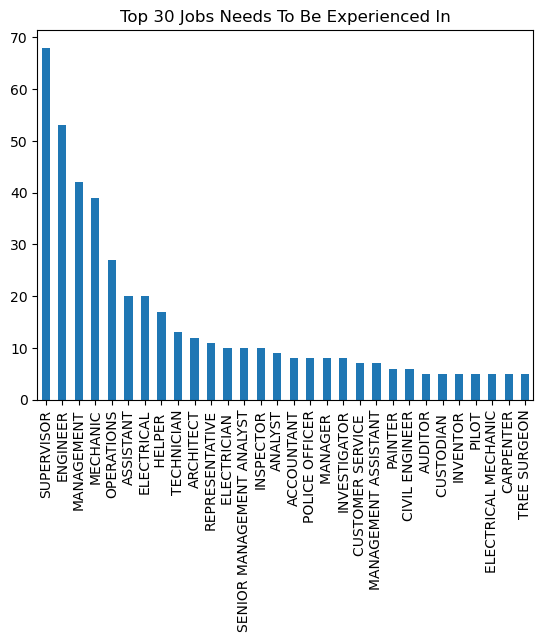

In [5]:
bulletins["EXP Job Title"].value_counts().head(30).plot(kind='bar',title="Top 30 Jobs Needs To Be Experienced In")


<Axes: title={'center': 'Top 30 Educational Majors Required'}>

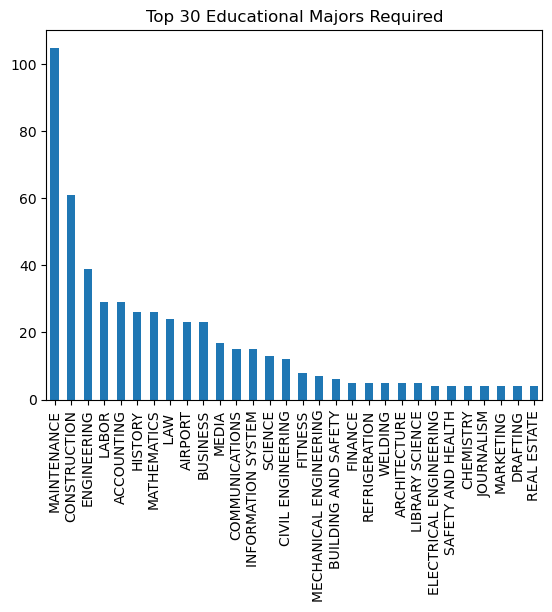

In [6]:
bulletins["Educational Major"].value_counts().head(30).plot(kind='bar',title="Top 30 Educational Majors Required")


In [7]:
# bulletins["EXP Job Title"].value_counts().plot(kind='bar')
print("These are  the top 15 expericed job required")
print(bulletins["EXP Job Title"].value_counts().head(15))

These are  the top 15 expericed job required
SUPERVISOR                   68
ENGINEER                     53
MANAGEMENT                   42
MECHANIC                     39
OPERATIONS                   27
ASSISTANT                    20
ELECTRICAL                   20
 HELPER                      17
TECHNICIAN                   13
ARCHITECT                    12
REPRESENTATIVE               11
ELECTRICIAN                  10
SENIOR MANAGEMENT ANALYST    10
INSPECTOR                    10
ANALYST                       9
Name: EXP Job Title, dtype: int64


As we can see , some bulletins are not requested experience job
some bulletins also are not requesting a specific number of experience years
Education years ,school type ,and major are also not requested in some bulletins
full time or part time is not mentioned in 45 job bulletins we will see how we can handle this issues .
There is a one bulletin with no exam type .

So Now Lets handle these None values to get a nice analysis.


In [8]:
bulletins_df=bulletins.copy()
bulletins[["EXP Job Title","Educational Major","School Type"]]=bulletins[["EXP Job Title","Educational Major","School Type"]].fillna("Not-Required")
print(bulletins.isna().sum())

File Name                      0
Job Title                      0
EXP Job Title                  0
Job Number                     2
Job Duties                     0
Salary Range                   1
Open Date                      0
Experience Years Required     45
Education Years              382
PART-TIME OR FULL-TIME        45
School Type                    0
Educational Major              0
Required License               0
Exam Type                      1
Course Counts                  0
Course Length In Months        0
Job Requirements               0
dtype: int64


In [9]:
bulletins[["Education Years","Experience Years Required"]]=bulletins[["Education Years","Experience Years Required"]].fillna(0)
print(bulletins.isna().sum())

File Name                     0
Job Title                     0
EXP Job Title                 0
Job Number                    2
Job Duties                    0
Salary Range                  1
Open Date                     0
Experience Years Required     0
Education Years               0
PART-TIME OR FULL-TIME       45
School Type                   0
Educational Major             0
Required License              0
Exam Type                     1
Course Counts                 0
Course Length In Months       0
Job Requirements              0
dtype: int64


In [10]:
print(bulletins["PART-TIME OR FULL-TIME"].unique())
bulletins["PART-TIME OR FULL-TIME"]=bulletins["PART-TIME OR FULL-TIME"].replace("FULL TIME","FULL-TIME")
print(bulletins["PART-TIME OR FULL-TIME"].unique())
print(bulletins["PART-TIME OR FULL-TIME"].value_counts())



[None 'FULL-TIME' 'FULL TIME' 'PART-TIME']
[None 'FULL-TIME' 'PART-TIME']
FULL-TIME    626
PART-TIME     12
Name: PART-TIME OR FULL-TIME, dtype: int64


<Axes: >

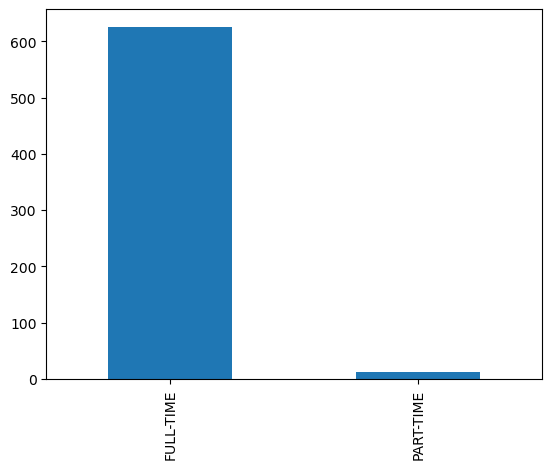

In [11]:
bulletins["PART-TIME OR FULL-TIME"].value_counts().plot(kind="bar")


We can see that most of values on this feature is full-time
626 for full-time , 12 for part-time and 45 values with None 
Since the varience between these two types is too small where bulletins
follow full-time in most cases 
and since we have 45 of non-mentioned values ,I think it's suitable to drop 
full-time or part-time feature , unless some one is looking for part-time bulletins , its choices and chances would be very very small.
I will create a cleaned copy of my datafram ,so if I need to back to use this feature I still can .

In [12]:
cleaned_bulletins=bulletins.drop("PART-TIME OR FULL-TIME",axis=1)
print(cleaned_bulletins.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File Name                  683 non-null    object 
 1   Job Title                  683 non-null    object 
 2   EXP Job Title              683 non-null    object 
 3   Job Number                 681 non-null    object 
 4   Job Duties                 683 non-null    object 
 5   Salary Range               682 non-null    object 
 6   Open Date                  683 non-null    object 
 7   Experience Years Required  683 non-null    float64
 8   Education Years            683 non-null    float64
 9   School Type                683 non-null    object 
 10  Educational Major          683 non-null    object 
 11  Required License           683 non-null    object 
 12  Exam Type                  682 non-null    object 
 13  Course Counts              683 non-null    int64  

In [13]:
print(cleaned_bulletins.isna().sum())

File Name                    0
Job Title                    0
EXP Job Title                0
Job Number                   2
Job Duties                   0
Salary Range                 1
Open Date                    0
Experience Years Required    0
Education Years              0
School Type                  0
Educational Major            0
Required License             0
Exam Type                    1
Course Counts                0
Course Length In Months      0
Job Requirements             0
dtype: int64


In [14]:
print(cleaned_bulletins["School Type"].value_counts())

Not-Required             356
COLLEGE OR UNIVERSITY    209
APPRENTICESHIP            48
COLLEGE                   23
SCHOOL                    21
HIGH SCHOOL               17
DIPLOMA                    3
MASTER                     3
UNIVERSITY                 1
UNIVERSITY OR COLLEGE      1
BACHELOR                   1
Name: School Type, dtype: int64


The School Type should be limited to 3 categories : COLLEGE OR UNIVERSITY , APPRENTICESHIP , HIGH SCHOOL 

In [15]:
school_types_list=[]
for tp in schools:
    str_type = isinstance(tp, str)
    if str_type:

        t=re.search("UNIVERSITY|COLLEGE|BACHELOR|MASTER|DIPLOMA",tp)
        if t:
            school_types_list.append("COLLEGE OR UNIVERSITY")
        else:
            t=re.search("SCHOOL",tp)
            if t:
                school_types_list.append("HIGH SCHOOL")
            else:
                t=re.search("APPRENTICESHIP",tp)
                if t:
                    school_types_list.append("APPRENTICESHIP")
                else:
                    school_types_list.append("Not-Required")
    else:
        school_types_list.append("Not-Required")
        
                
cleaned_bulletins["School Types"]=school_types_list
print(cleaned_bulletins["School Types"].value_counts())

                

                
            
        
    

Not-Required             356
COLLEGE OR UNIVERSITY    241
APPRENTICESHIP            48
HIGH SCHOOL               38
Name: School Types, dtype: int64


<Axes: title={'center': 'Requested School Types For Bulletins'}>

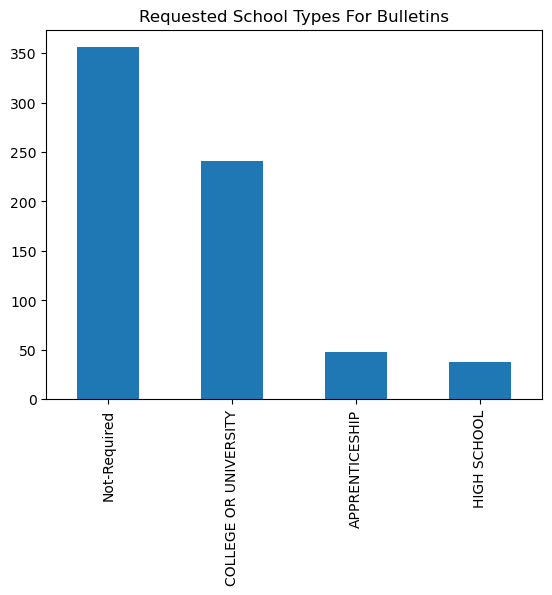

In [16]:
cleaned_bulletins["School Types"].value_counts().plot(kind="bar",title="Requested School Types For Bulletins")

In [17]:
# cleaned_bulletins=bulletins.drop("School Type",axis=1)
print(cleaned_bulletins.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File Name                  683 non-null    object 
 1   Job Title                  683 non-null    object 
 2   EXP Job Title              683 non-null    object 
 3   Job Number                 681 non-null    object 
 4   Job Duties                 683 non-null    object 
 5   Salary Range               682 non-null    object 
 6   Open Date                  683 non-null    object 
 7   Experience Years Required  683 non-null    float64
 8   Education Years            683 non-null    float64
 9   School Type                683 non-null    object 
 10  Educational Major          683 non-null    object 
 11  Required License           683 non-null    object 
 12  Exam Type                  682 non-null    object 
 13  Course Counts              683 non-null    int64  

Now I will handle the salary range issue before I drop any record .. for the current format its Not possible to make calculations
So I will make a new feature which contains the average of the salary to make it easier for me and clear for analysis.

In [18]:
avg_ls=[]
for salary in annual_salary_list:
    string_type = isinstance(salary, str)
    if string_type:
        flat_salary=re.search("\$(\d+,\d+)[\s\S]*flat",salary,re.IGNORECASE)
        if flat_salary:
            flat_salary=flat_salary.group(1)
            flat_salary= int((re.sub(",", "",flat_salary)))
            avg_ls.append(flat_salary)

        else:
            sal1 = re.search("\$(\d+,\d+) ", salary)
            if sal1:
                sal1 = sal1.group(1)
                sal1 = int((re.sub(",", "", sal1)))

            sal2 = re.search(" \$(\d+,\d+)", salary)
            if sal2:
                sal2 = sal2.group(1)
                sal2 = int((re.sub(",", "", sal2)))
            if (sal1 and sal2):
                avg = ((sal1 + sal2) / 2)
                avg_ls.append(avg)
            else:
                sal3=re.search("\d+,\d+",salary)
                if sal3:
                    sal3=sal3.group()
                    sal3 = int((re.sub(",", "", sal3)))
                    avg_ls.append(sal3)
                else:
                    avg_ls.append(None)

    else:
        avg_ls.append(None)

In [19]:
cleaned_bulletins["AVG Salary"]=avg_ls
print(cleaned_bulletins.head())
print(cleaned_bulletins.info())

                                           File Name  \
0  /kaggle/input/data-science-for-good-city-of-lo...   
1  /kaggle/input/data-science-for-good-city-of-lo...   
2  /kaggle/input/data-science-for-good-city-of-lo...   
3  /kaggle/input/data-science-for-good-city-of-lo...   
4  /kaggle/input/data-science-for-good-city-of-lo...   

                             Job Title            EXP Job Title Job Number  \
0             WATER TREATMENT OPERATOR             Not-Required       5885   
1  HEATING AND REFRIGERATION INSPECTOR                 MECHANIC       4245   
2         CHIEF CONSTRUCTION INSPECTOR  CONSTRUCTION INSPECTOR        7296   
3                    PERSONNEL ANALYST     MANAGEMENT ASSISTANT       1731   
4    SENIOR LABOR RELATIONS SPECIALIST                  ANALYST       9202   

                                          Job Duties  \
0  A Water Treatment Operator does skilled work i...   
1  A Heating and Refrigeration Inspector makes in...   
2  A Chief Construction In

In [20]:
cleaned_bulletins=cleaned_bulletins.drop('Salary Range',axis=1)


In [21]:
missing_salary=(cleaned_bulletins[cleaned_bulletins["AVG Salary"].isnull()])
print(missing_salary)

                                             File Name  \
284  /kaggle/input/data-science-for-good-city-of-lo...   
367  /kaggle/input/data-science-for-good-city-of-lo...   

                                            Job Title EXP Job Title  \
284  DEPARTMENT OF PUBLIC WORKS\nBUREAU OF SANITATION    CUSTODIAN    
367                         AIRPORT POLICE SPECIALIST  Not-Required   

    Job Number                                         Job Duties  \
284       None  AND RESPONSIBILITIES Under the direction of a ...   
367       3236  As a sworn member of the Los Angeles World Air...   

          Open Date  Experience Years Required  Education Years   School Type  \
284  March 10, 2015                        0.0              0.0  Not-Required   
367        06-30-17                        0.0              0.0  Not-Required   

    Educational Major Required License                          Exam Type  \
284       MAINTENANCE                R                               None   
367  

In [22]:
airport=cleaned_bulletins[cleaned_bulletins["Educational Major"]=="AIRPORT"]
airport_avg_salary=airport["AVG Salary"].mean()
mainten=cleaned_bulletins[cleaned_bulletins["Educational Major"]=="MAINTENANCE"]
mainten_avg_salary=mainten["AVG Salary"].mean()
cleaned_bulletins.loc[20,"AVG Salary"]=airport_avg_salary
cleaned_bulletins.loc[646,"AVG Salary"]=mainten_avg_salary




In [23]:
print(cleaned_bulletins["AVG Salary"].describe())

count       681.000000
mean      92147.131705
std       31132.590486
min       34671.000000
25%       69989.500000
50%       88218.000000
75%      109223.000000
max      263610.000000
Name: AVG Salary, dtype: float64


/tmp/ipykernel_21/3966981250.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_bulletins["AVG Salary"])


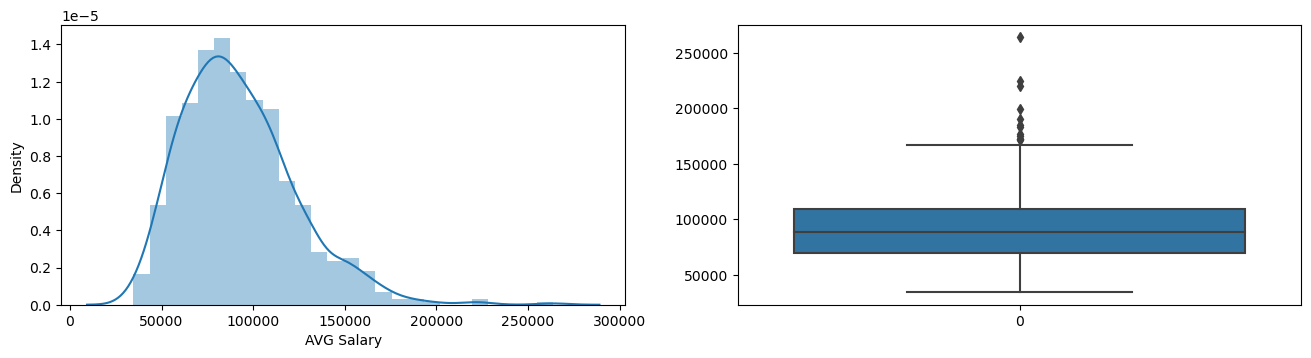

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(cleaned_bulletins["AVG Salary"])
plt.subplot(2,2,2)
sns.boxplot(cleaned_bulletins["AVG Salary"])
plt.show()

In [25]:
# I still cant judge for outlires before I make a normalization
normalized_salary=(cleaned_bulletins["AVG Salary"]-cleaned_bulletins["AVG Salary"].min())/(cleaned_bulletins["AVG Salary"].max()-cleaned_bulletins["AVG Salary"].min())
cleaned_bulletins["Normalized AVG Salary"]=normalized_salary
print(cleaned_bulletins["Normalized AVG Salary"].describe())

count    681.000000
mean       0.251054
std        0.135986
min        0.000000
25%        0.154270
50%        0.233892
75%        0.325641
max        1.000000
Name: Normalized AVG Salary, dtype: float64


/tmp/ipykernel_21/856959468.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_bulletins["Normalized AVG Salary"])


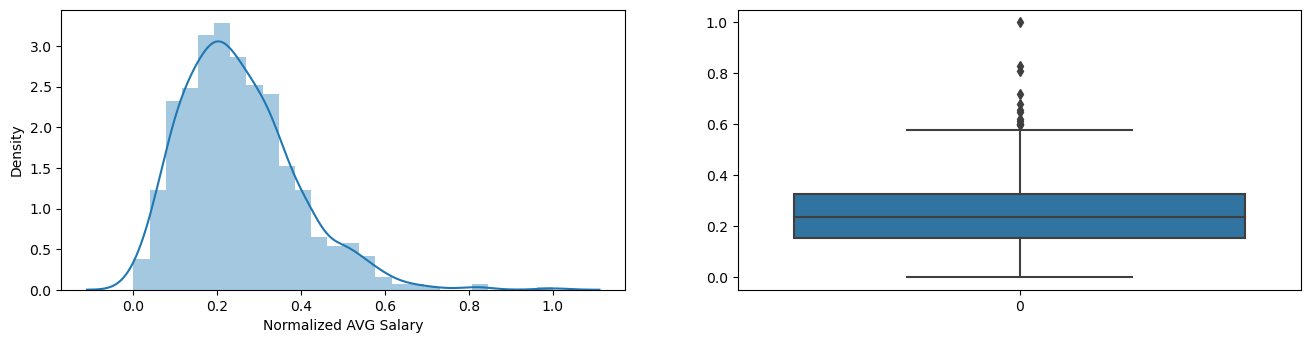

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(cleaned_bulletins["Normalized AVG Salary"])
plt.subplot(2,2,2)
sns.boxplot(cleaned_bulletins["Normalized AVG Salary"])
plt.show()

Now lets remove the outlires to get better results.

In [27]:
Q1 = np.percentile(cleaned_bulletins["Normalized AVG Salary"], 25,interpolation = 'midpoint')
Q3 = np.percentile(cleaned_bulletins["Normalized AVG Salary"], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

nan


/tmp/ipykernel_21/2842323663.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(cleaned_bulletins["Normalized AVG Salary"], 25,interpolation = 'midpoint')
/tmp/ipykernel_21/2842323663.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(cleaned_bulletins["Normalized AVG Salary"], 75,interpolation = 'midpoint')


In [28]:
upper = np.where(cleaned_bulletins["Normalized AVG Salary"] >= (Q3+1.5*IQR))
lower = np.where(cleaned_bulletins["Normalized AVG Salary"] <= (Q1-1.5*IQR))
print(upper)
print(lower)
# print(cleaned_bulletins.loc[[upper,lower],:])
cleaned_bulletins.drop(upper[0], inplace = True)
cleaned_bulletins.drop(lower[0], inplace = True)
print("New Shape: ", cleaned_bulletins.shape)



(array([], dtype=int64),)
(array([], dtype=int64),)
New Shape:  (683, 18)


Lets visualize AVG Salary after outliers being removed

/tmp/ipykernel_21/3742368360.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_bulletins["AVG Salary"])


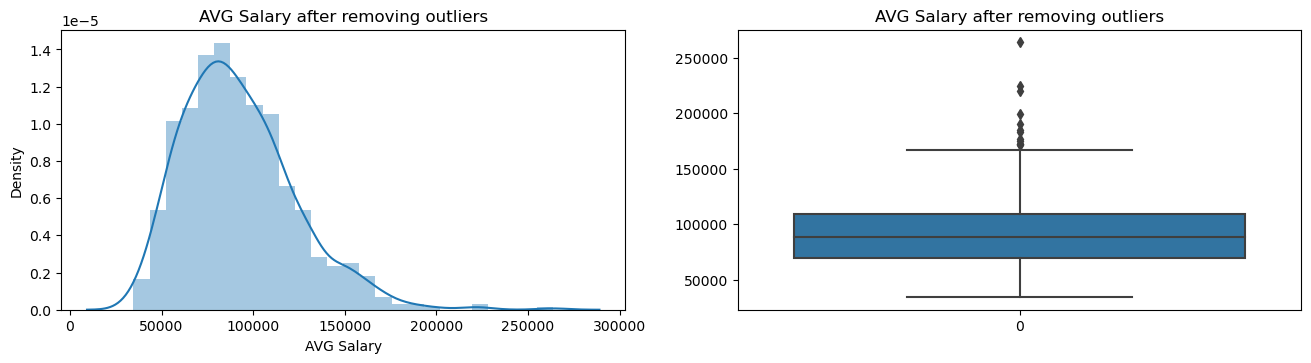

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(cleaned_bulletins["AVG Salary"])
plt.title("AVG Salary after removing outliers")

plt.subplot(2,2,2)
sns.boxplot(cleaned_bulletins["AVG Salary"])
plt.title("AVG Salary after removing outliers")
plt.show()

In [30]:
cleaned_bulletins=cleaned_bulletins.drop("Normalized AVG Salary",axis=1)

In [31]:
print(cleaned_bulletins["Job Number"].nunique())
print(cleaned_bulletins['Job Number'].value_counts().head(8))


676
5885    2
3980    2
3753    2
1249    2
4123    2
1213    1
3840    1
1119    1
Name: Job Number, dtype: int64


Job Number feature must be unique so , I will review these files information that have the same job number to figure out what if there is a problem to handle.

In [32]:
print(cleaned_bulletins[cleaned_bulletins['Job Number'].isin(["4123","3980","1249","3753","5885"])].sort_values('Job Number'))

                                             File Name  \
90   /kaggle/input/data-science-for-good-city-of-lo...   
666  /kaggle/input/data-science-for-good-city-of-lo...   
185  /kaggle/input/data-science-for-good-city-of-lo...   
195  /kaggle/input/data-science-for-good-city-of-lo...   
261  /kaggle/input/data-science-for-good-city-of-lo...   
396  /kaggle/input/data-science-for-good-city-of-lo...   
344  /kaggle/input/data-science-for-good-city-of-lo...   
682  /kaggle/input/data-science-for-good-city-of-lo...   
0    /kaggle/input/data-science-for-good-city-of-lo...   
38   /kaggle/input/data-science-for-good-city-of-lo...   

                              Job Title EXP Job Title Job Number  \
90                   CHIEF CLERK POLICE    MANAGEMENT       1249   
666                  CHIEF CLERK POLICE    MANAGEMENT       1249   
185  SENIOR UTILITY SERVICES SPECIALIST    MANAGEMENT       3753   
195  SENIOR UTILITY SERVICES SPECIALIST    MANAGEMENT       3753   
261        WATER UTIL

For "CHIEF CLERK POLICE" the same job bulletin is duplicated ,but the difference is in open date and salary , the first one is in 2015 and the second one is in 2018 with higher salary range and that is logical.
because this causes a data redundancy I will drop one of the records, and by logic I will keep the one with newer date.

For "SENIOR UTILITY SERVICES SPECIALIST" AND "WATER UTILITY SUPERINTENDENT"  the same case of CHIEF CLERK POLICE so I will just keep the newer records which in 2018.

For "WASTEWATER TREATMENT OPERATOR" not all features have the same values even if its the same job .. but one of the records contains more information "requirements" than the other one so I will keep it and drop the other one to avoid data redundancy.

For "WATER TREATMENT OPERATOR" I have got the same values ,so I have check the files it seems that they got the same content .For first file name it seems that is some thing wrong which is against features we have got this is the file name : "ANIMAL CARE TECHNICIAN SUPERVISOR 4313 122118.txt"

And this is the other file name :"WATER TREATMENT OPERATOR 5885 122118.txt " which is looks more suitable for the content than the ANIMAL CARE file . so I will keep the record of WATER TREATMENT ,And drop the record of ANIMAL CARE.







In [33]:
cleaned_bulletins=cleaned_bulletins.drop([107,558,508,656,27])
print(cleaned_bulletins['Job Number'].value_counts().head())
print(cleaned_bulletins[cleaned_bulletins['Job Number'].isin(["4123","3980","1249","3753","5885"])].sort_values('Job Number'))
print("New Shape :",cleaned_bulletins.shape)


5885    2
1249    2
3980    2
3753    2
4123    2
Name: Job Number, dtype: int64
                                             File Name  \
90   /kaggle/input/data-science-for-good-city-of-lo...   
666  /kaggle/input/data-science-for-good-city-of-lo...   
185  /kaggle/input/data-science-for-good-city-of-lo...   
195  /kaggle/input/data-science-for-good-city-of-lo...   
261  /kaggle/input/data-science-for-good-city-of-lo...   
396  /kaggle/input/data-science-for-good-city-of-lo...   
344  /kaggle/input/data-science-for-good-city-of-lo...   
682  /kaggle/input/data-science-for-good-city-of-lo...   
0    /kaggle/input/data-science-for-good-city-of-lo...   
38   /kaggle/input/data-science-for-good-city-of-lo...   

                              Job Title EXP Job Title Job Number  \
90                   CHIEF CLERK POLICE    MANAGEMENT       1249   
666                  CHIEF CLERK POLICE    MANAGEMENT       1249   
185  SENIOR UTILITY SERVICES SPECIALIST    MANAGEMENT       3753   
195  SEN

After I have use the the job number to get redundant values , there is no need for it anymore in my analysis its just like id_number that refers to a job , but I have job title so there is no need to keep job number and file name in analysis.

In [34]:
cleaned_bulletins=cleaned_bulletins.drop(['Job Number','File Name'],axis=1)
print(cleaned_bulletins.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 682
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job Title                  678 non-null    object 
 1   EXP Job Title              678 non-null    object 
 2   Job Duties                 678 non-null    object 
 3   Open Date                  678 non-null    object 
 4   Experience Years Required  678 non-null    float64
 5   Education Years            678 non-null    float64
 6   School Type                678 non-null    object 
 7   Educational Major          678 non-null    object 
 8   Required License           678 non-null    object 
 9   Exam Type                  677 non-null    object 
 10  Course Counts              678 non-null    int64  
 11  Course Length In Months    678 non-null    int64  
 12  Job Requirements           678 non-null    object 
 13  School Types               678 non-null    object 

In [35]:
print(cleaned_bulletins.isna().sum())

Job Title                    0
EXP Job Title                0
Job Duties                   0
Open Date                    0
Experience Years Required    0
Education Years              0
School Type                  0
Educational Major            0
Required License             0
Exam Type                    1
Course Counts                0
Course Length In Months      0
Job Requirements             0
School Types                 0
AVG Salary                   2
dtype: int64


ONLY ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS                      324
BOTH AN INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS    208
ONLY ON AN OPEN COMPETITIVE BASIS                                   145
Name: Exam Type, dtype: int64


<Axes: >

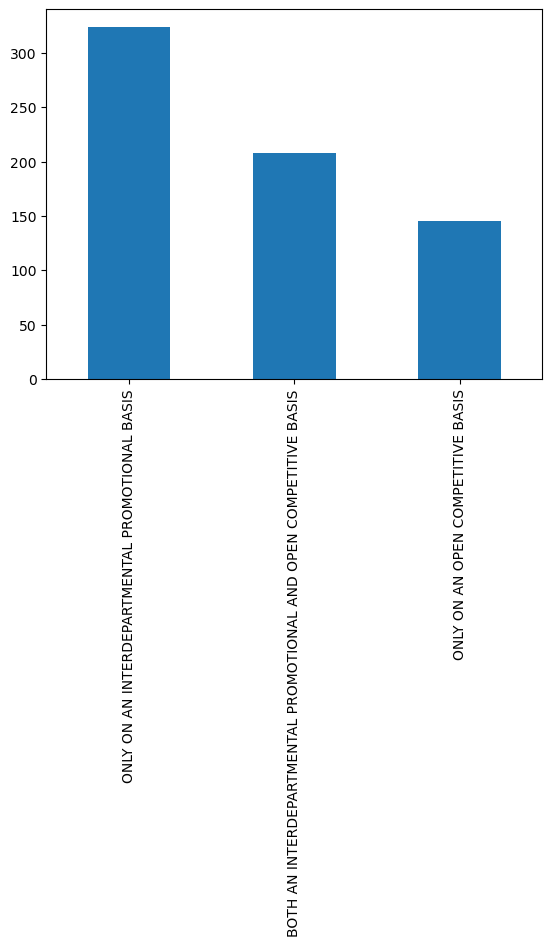

In [36]:
print(cleaned_bulletins["Exam Type"].value_counts())
cleaned_bulletins["Exam Type"].value_counts().plot(kind="bar")


In [37]:
print(cleaned_bulletins[cleaned_bulletins["Exam Type"].isnull()])

                                            Job Title EXP Job Title  \
284  DEPARTMENT OF PUBLIC WORKS\nBUREAU OF SANITATION    CUSTODIAN    

                                            Job Duties       Open Date  \
284  AND RESPONSIBILITIES Under the direction of a ...  March 10, 2015   

     Experience Years Required  Education Years   School Type  \
284                        0.0              0.0  Not-Required   

    Educational Major Required License Exam Type  Course Counts  \
284       MAINTENANCE                R      None              1   

     Course Length In Months  \
284                        1   

                                      Job Requirements  School Types  \
284  These positions are open to all who apply with...  Not-Required   

     AVG Salary  
284         NaN  


I don't want to lose any record so I will try to fill missing value of Exam Type with the suitable type 
I will check the jobs that its required major  is maintenance then I will take the mode of exam type in these combination

In [38]:
maintenance=cleaned_bulletins[cleaned_bulletins["Educational Major"]=="MAINTENANCE"]
type_mode=(maintenance["Exam Type"].mode()[0])
print(type_mode)
cleaned_bulletins["Exam Type"]=cleaned_bulletins["Exam Type"].fillna(type_mode)
print(cleaned_bulletins.isna().sum())



ONLY ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS
Job Title                    0
EXP Job Title                0
Job Duties                   0
Open Date                    0
Experience Years Required    0
Education Years              0
School Type                  0
Educational Major            0
Required License             0
Exam Type                    0
Course Counts                0
Course Length In Months      0
Job Requirements             0
School Types                 0
AVG Salary                   2
dtype: int64


I will change the type for open date to be "DateTime" 
Exp years --> INT
Edu years --> INT

In [39]:
cleaned_bulletins['Open Date']= pd.to_datetime(cleaned_bulletins['Open Date'])
cleaned_bulletins= cleaned_bulletins.astype({"Experience Years Required":'int', "Education Years":'int'}) 
print(cleaned_bulletins.dtypes)
print(cleaned_bulletins.head())


Job Title                            object
EXP Job Title                        object
Job Duties                           object
Open Date                    datetime64[ns]
Experience Years Required             int64
Education Years                       int64
School Type                          object
Educational Major                    object
Required License                     object
Exam Type                            object
Course Counts                         int64
Course Length In Months               int64
Job Requirements                     object
School Types                         object
AVG Salary                          float64
dtype: object
                             Job Title            EXP Job Title  \
0             WATER TREATMENT OPERATOR             Not-Required   
1  HEATING AND REFRIGERATION INSPECTOR                 MECHANIC   
2         CHIEF CONSTRUCTION INSPECTOR  CONSTRUCTION INSPECTOR    
3                    PERSONNEL ANALYST     MANAGEMENT ASSI

### <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

### <span style="color:brown">Q1:

A non-experienced job seeker wants to know what is the best job for him?

In [40]:
# Non-expericed job seeker will looks for less requirements bulletins which doesn't require a Experience job or a number or experice years
# so lets get it .
# I want to get bulletins where exp job is "Not-Required" and exp years =zero which means that is not required
no_exp=cleaned_bulletins[(cleaned_bulletins["EXP Job Title"]=="Not-Required") & (cleaned_bulletins["Experience Years Required"]==0)]
# For best choice ,job seeker will aim to best avg salary  that can get 
no_exp=no_exp.sort_values(by="AVG Salary",ascending=False)
print("The Best bulletin that requires no experienced job and no experience years and get the best average salary is : ")
print(no_exp.head(1))





The Best bulletin that requires no experienced job and no experience years and get the best average salary is : 
            Job Title EXP Job Title  \
434  POLICE COMMANDER  Not-Required   

                                            Job Duties  Open Date  \
434  A Police Commander assists the commanding offi... 2017-09-29   

     Experience Years Required  Education Years            School Type  \
434                          0                4  COLLEGE OR UNIVERSITY   

    Educational Major Required License  \
434           HISTORY               NR   

                                          Exam Type  Course Counts  \
434  ONLY ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS              0   

     Course Length In Months  \
434                        0   

                                      Job Requirements           School Types  \
434  1. Current status as a Police Captain in the L...  COLLEGE OR UNIVERSITY   

     AVG Salary  
434    199685.5  


The previous answer is just based on experience in jobs,but in my opinion these jobs may require a specific educational major that job seeker doesn't have , so  in addition I will look for jobs that have no educational major requirements. 

In [41]:
no_exp_no_edu=cleaned_bulletins[(cleaned_bulletins["EXP Job Title"]=="Not-Required") & (cleaned_bulletins["Experience Years Required"]==0) & (cleaned_bulletins["Educational Major"]=="Not-Required") ]
no_exp_no_edu=no_exp_no_edu.sort_values(by="AVG Salary",ascending=False)
print("The Best bulletin that requires no experienced job and no experience years also a non-educational major and get the best average salary is : ")
print(no_exp_no_edu.head(1))

The Best bulletin that requires no experienced job and no experience years also a non-educational major and get the best average salary is : 
                         Job Title EXP Job Title  \
682  WASTEWATER TREATMENT OPERATOR  Not-Required   

                                            Job Duties  Open Date  \
682  A Wastewater Treatment Operator operates waste... 2018-12-07   

     Experience Years Required  Education Years   School Type  \
682                          0                0  Not-Required   

    Educational Major Required License                          Exam Type  \
682      Not-Required                R  ONLY ON AN OPEN COMPETITIVE BASIS   

     Course Counts  Course Length In Months  \
682              0                        0   

                                      Job Requirements  School Types  \
682  1. Current employment with the City of Los Ang...  Not-Required   

     AVG Salary  
682     94361.0  


### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

School Types
APPRENTICESHIP           85139.510870
COLLEGE OR UNIVERSITY    93759.219548
HIGH SCHOOL              67455.618421
Name: AVG Salary, dtype: float64


<Axes: title={'center': 'AVG Salary For Each School Type'}, xlabel='School Types'>

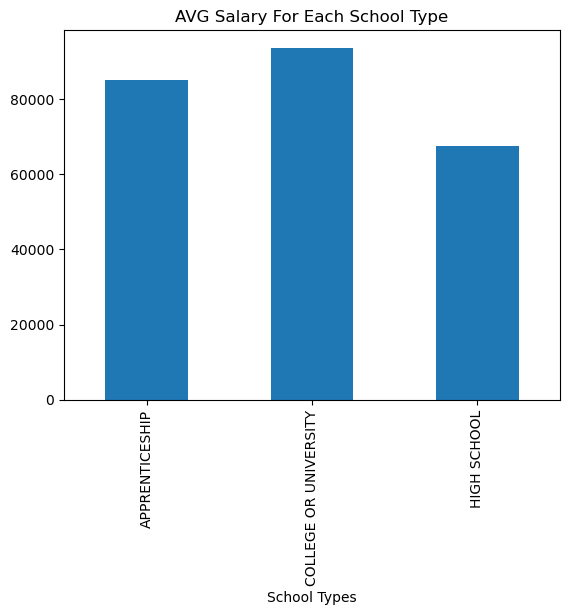

In [42]:
### Write you code here ###
# I will find the mean of the AVG Salary for each of a school type,then finds out.
S_A_U=cleaned_bulletins[(cleaned_bulletins["School Types"]!="Not-Required")]
type_and_salary=S_A_U["AVG Salary"].groupby(by=S_A_U["School Types"]).mean()
print(type_and_salary)
type_and_salary.plot(kind="bar",title="AVG Salary For Each School Type")

I recommend College or University as a best choice , then APPRENTICESHIP in the second , and high school as last choice

### <span style="color:brown">Q3:

What the best time in the year to be ready for a job applying in any experience level?

In [43]:
### Write you code here ###
# I will subset only the day and the month from each date to see if there is specific day and month usually opening at it.
cleaned_bulletins['Month-Day'] = pd.to_datetime(cleaned_bulletins['Open Date']).dt.strftime('%m-%d')
print(cleaned_bulletins['Month-Day'].value_counts())
cleaned_bulletins=cleaned_bulletins.drop('Month-Day',axis=1)



01-20    12
11-16     9
01-27     9
09-28     8
01-26     8
         ..
12-19     1
06-03     1
03-22     1
06-06     1
04-17     1
Name: Month-Day, Length: 215, dtype: int64


January 20th is the most common date in the year ,to be ready to apply for a job .  

### <span style="color:brown">Q4:

Is experience more important than educational level?

In [44]:
### Write you code here ### 
# I will compare between requirements between education level"school type" and experience required .
no_school=(cleaned_bulletins[cleaned_bulletins["School Types"]=="Not-Required"]["School Types"].value_counts())
no_exp_job=(cleaned_bulletins[cleaned_bulletins["EXP Job Title"]=="Not-Required"]["EXP Job Title"].value_counts())
no_exp_years=(cleaned_bulletins[cleaned_bulletins["Experience Years Required"]==0]["Experience Years Required"].value_counts())
print("Number of bulletins with no school type requirement : ")
print(no_school)
print("Number of bulletins with no experience job requirement : ")
print(no_exp_job)
print("Number of bulletins with no experience years requirement : ")
print(no_exp_years)

Number of bulletins with no school type requirement : 
Not-Required    354
Name: School Types, dtype: int64
Number of bulletins with no experience job requirement : 
Not-Required    39
Name: EXP Job Title, dtype: int64
Number of bulletins with no experience years requirement : 
0    45
Name: Experience Years Required, dtype: int64


344 bulletins with no school type requirement,36 bulletins with no experience job requirement and 42 with no experience years
So Now it's easy to say that EXPERIENCE is more important than educational level.

### <span style="color:brown">Q5:

Which fresh grade job that will guarantee many job offers in the future for him?

SUPERVISOR            68
ENGINEER              52
MANAGEMENT            42
Not-Required          39
MECHANIC              39
                      ..
INVESTMENT ADVISOR     1
CONSULTANT             1
REGISTERED NURSE       1
MERCHANT               1
UPHOLSTERER            1
Name: EXP Job Title, Length: 139, dtype: int64


<Axes: title={'center': 'Top 4 EXP JOBS REQUIRED'}>

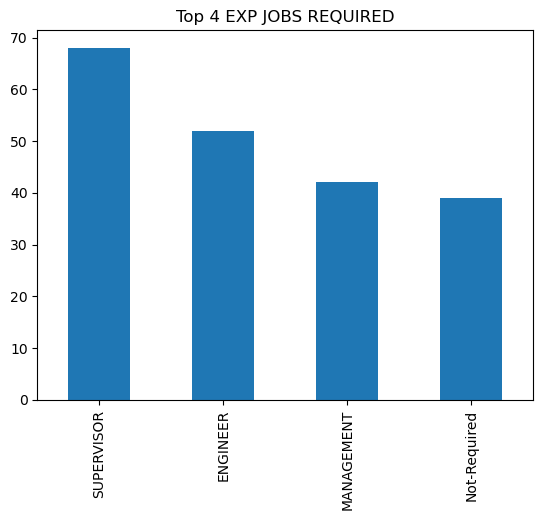

In [45]:
### Write you code here ###
print(cleaned_bulletins["EXP Job Title"].value_counts())
cleaned_bulletins["EXP Job Title"].value_counts().head(4).plot(kind='bar',title='Top 4 EXP JOBS REQUIRED')


SUPERVISOR is the most guarantee job that help to get many job opportunities in the future.

### <span style="color:brown">Q6:

"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER 
"

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments you structred above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?

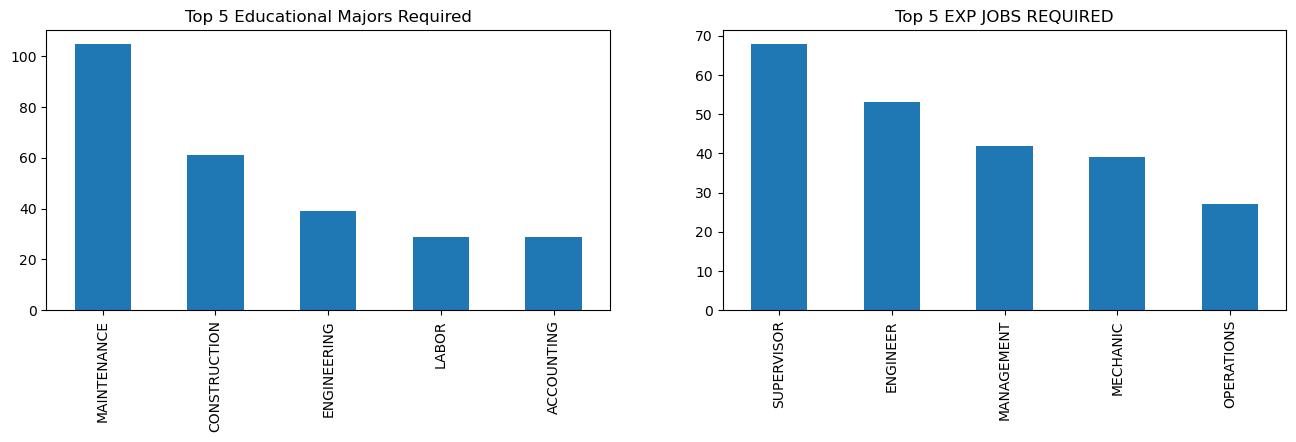

In [46]:
### Write you code here ###
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
bulletins_df["Educational Major"].value_counts().head(5).plot(kind='bar',title="Top 5 Educational Majors Required")
plt.subplot(2,2,2)
bulletins_df["EXP Job Title"].value_counts().head(5).plot(kind='bar',title='Top 5 EXP JOBS REQUIRED')
plt.show()


If we compare between top 5 majors and top 5 experienced jobs required , we will see "maintenance ,construction , engineering ,mechanic"
in the most common required bulletins .. Now as we know these jobs are more suitable for men than women .
So,the answer for the question is that applicant marital status may effect the chance to gain the job, and there is no bias .

### <span style="color:brown">Q7:

The city need an advice based on your analysis, build a new schools for more fresh non-experienced workers or encorge the work environment to help the workers to get promotions?

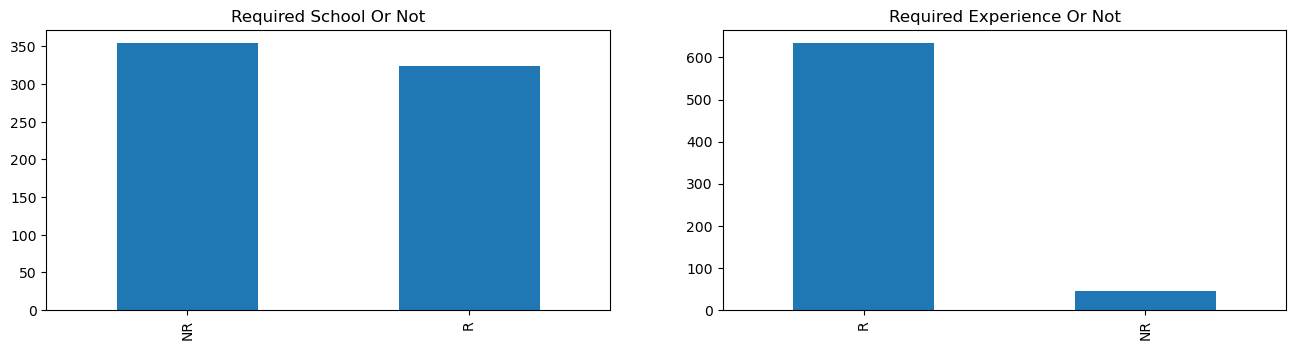

In [47]:
### Write you code here ###
# To get the answer I should compare between number of bulletins where experience years required 
# and between number of bulletins where schools is required
def req_schooll(value):
    if value!="Not-Required":
        return "R"
    else:
        return "NR"
def req_expp(value):
    if value!=0:
        return "R"
    else:
        return "NR"
    
cleaned_bulletins['School Required'] = cleaned_bulletins['School Types'].map(req_schooll)
cleaned_bulletins['Experience Required'] = cleaned_bulletins["Experience Years Required"].map(req_expp)

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
cleaned_bulletins['School Required'].value_counts().plot(kind='bar',title="Required School Or Not")
plt.subplot(2,2,2)
cleaned_bulletins['Experience Required'].value_counts().plot(kind='bar',title='Required Experience Or Not')
plt.show()

cleaned_bulletins=cleaned_bulletins.drop(['Experience Required','School Required'],axis=1)




If we compare between these two figures above,in the first figure we can see that many jobs still not asking for school type in their bulletins ,while when we see the second figure there is a huge difference between number of bulletins that requires an expeience years and number of bulletins that requires no experience years.
Since encorage the work environment to help the workers to get promotions means that workers will get more experience ,So this solution is better than build a new schools.

### <span style="color:brown">Q8:

What is the average salary for worker with a driver licence?

Required License
NR    90322.028846
R     92276.528352
Name: AVG Salary, dtype: float64


<Axes: title={'center': 'AVG SALARY FOR R/NR DRIVER LICENCE'}, xlabel='Required License'>

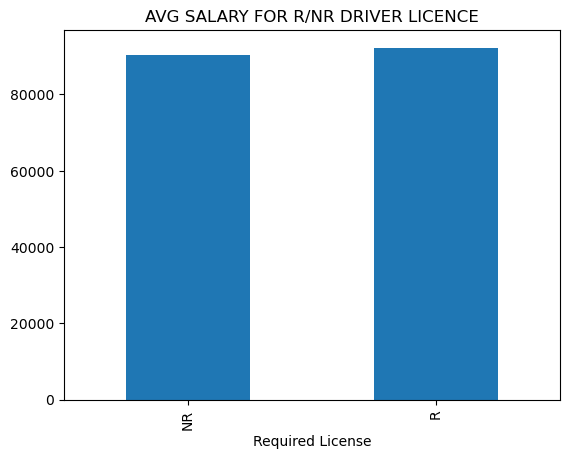

In [48]:
### Write you code here ###
salary_and_licence=cleaned_bulletins["AVG Salary"].groupby(by=cleaned_bulletins["Required License"]).mean()
print(salary_and_licence)
salary_and_licence.plot(kind="bar",title="AVG SALARY FOR R/NR DRIVER LICENCE")

It's 90673.936291 for worker with a driver licence.

## <span style="color:brown">Q9:

list the most feature that effect the salary of the worker.

/tmp/ipykernel_21/1918229216.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(cleaned_bulletins.corr())


                           Experience Years Required  Education Years  \
Experience Years Required                   1.000000         0.078323   
Education Years                             0.078323         1.000000   
Course Counts                              -0.165890         0.148151   
Course Length In Months                    -0.127837         0.172261   
AVG Salary                                  0.104722         0.038261   

                           Course Counts  Course Length In Months  AVG Salary  
Experience Years Required      -0.165890                -0.127837    0.104722  
Education Years                 0.148151                 0.172261    0.038261  
Course Counts                   1.000000                 0.640342   -0.208420  
Course Length In Months         0.640342                 1.000000   -0.165161  
AVG Salary                     -0.208420                -0.165161    1.000000  


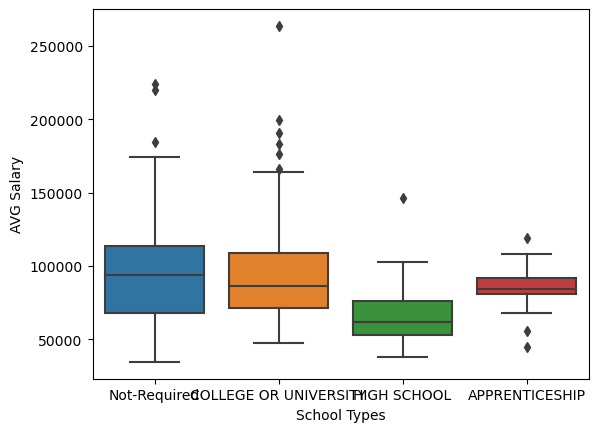

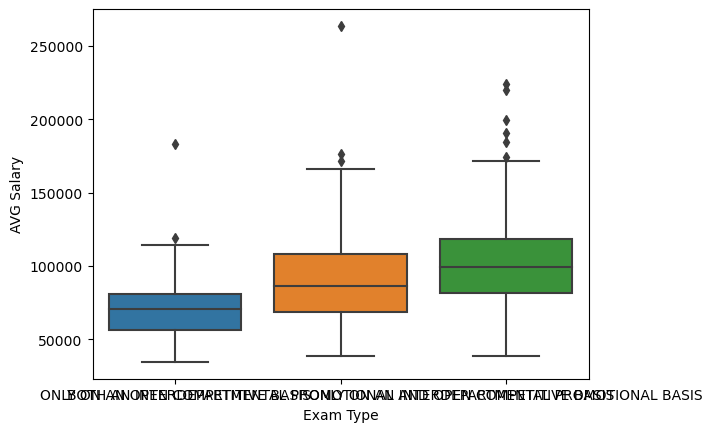

In [49]:
### Write you code here ###
print(cleaned_bulletins.corr())
sns.boxplot(x = 'School Types', y = 'AVG Salary', data = cleaned_bulletins)
plt.show()
sns.boxplot(x = 'Exam Type', y = 'AVG Salary', data = cleaned_bulletins)
plt.show()

## <span style="color:brown">Q10:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

In [50]:
### Write you code here ###
#note: use_univariate with continouius
print(cleaned_bulletins.describe())


       Experience Years Required  Education Years  Course Counts  \
count                 678.000000       678.000000     678.000000   
mean                    2.353982         1.474926       0.318584   
std                     1.401120         1.898096       0.816363   
min                     0.000000         0.000000       0.000000   
25%                     2.000000         0.000000       0.000000   
50%                     2.000000         0.000000       0.000000   
75%                     3.000000         4.000000       0.000000   
max                     8.000000         9.000000       8.000000   

       Course Length In Months     AVG Salary  
count               678.000000     676.000000  
mean                  0.662242   92126.182236  
std                   1.706558   31192.949586  
min                   0.000000   34671.000000  
25%                   0.000000   69905.500000  
50%                   0.000000   88191.750000  
75%                   0.000000  109175.750000  
max

<Axes: title={'center': 'Experience Years Required'}>

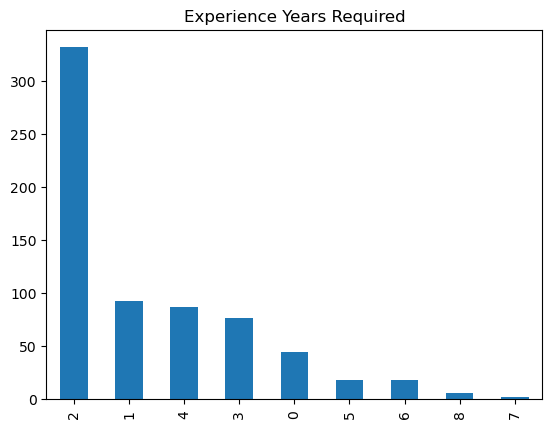

In [51]:
cleaned_bulletins["Experience Years Required"].value_counts().plot(kind='bar',title='Experience Years Required')

<Axes: title={'center': 'Education Years Required'}>

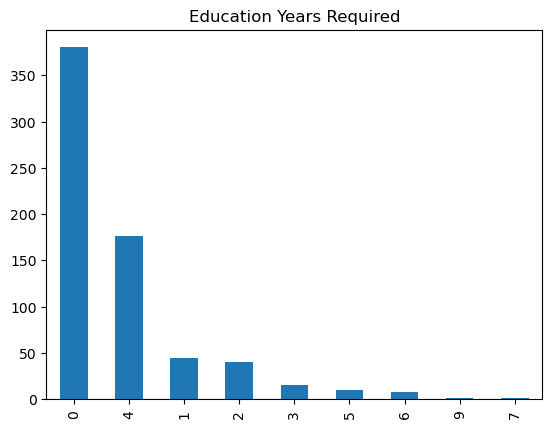

In [52]:
cleaned_bulletins["Education Years"].value_counts().plot(kind='bar',title='Education Years Required')

<Axes: title={'center': 'Course Counts Required'}>

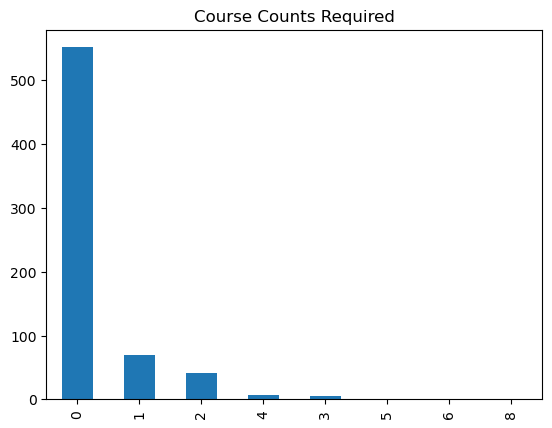

In [53]:
cleaned_bulletins["Course Counts"].value_counts().plot(kind='bar',title='Course Counts Required')

<Axes: title={'center': 'Course Length In Months Required'}>

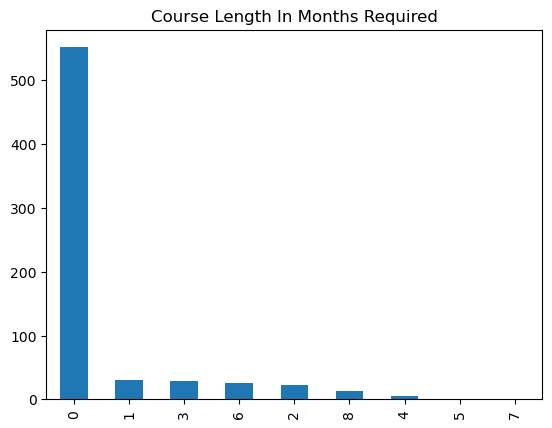

In [54]:
cleaned_bulletins["Course Length In Months"].value_counts().plot(kind='bar',title='Course Length In Months Required')


/tmp/ipykernel_21/728971199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_bulletins["AVG Salary"],kde=True,color="g")


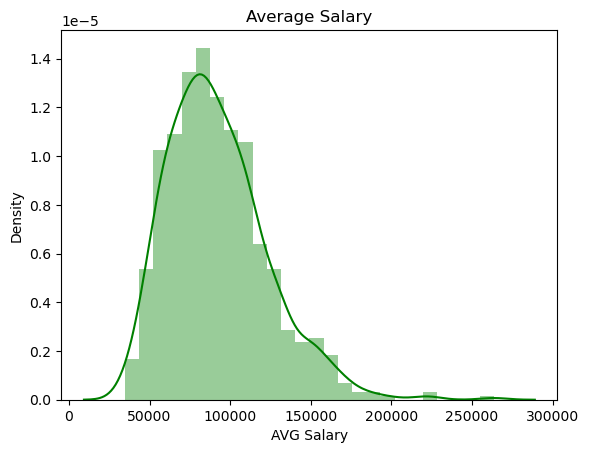

In [55]:
sns.distplot(cleaned_bulletins["AVG Salary"],kde=True,color="g")
plt.title("Average Salary")
plt.show()

As a summary of these figures ,we can see that most bulletins don't ask for courses as a first requirement.
Experience years is extremely required.
Number of education years is not required in the most bulletins , but in the bulletins that is ask for it's good to know that they require 4 years in most cases.
Average salary values are in a normal distributed pattern with no skew , which is good.

## <span style="color:brown">Q11:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


In [56]:
### Write you code here ###
#note: use_univariate with catergircal
#using pie chart
print(cleaned_bulletins.describe(exclude="number"))


                       Job Title EXP Job Title  \
count                        678           678   
unique                       673           139   
top     WATER TREATMENT OPERATOR    SUPERVISOR   
freq                           2            68   
first                        NaN           NaN   
last                         NaN           NaN   

                                               Job Duties  \
count                                                 678   
unique                                                678   
top     A Water Treatment Operator does skilled work i...   
freq                                                    1   
first                                                 NaN   
last                                                  NaN   

                  Open Date   School Type Educational Major Required License  \
count                   678           678               678              678   
unique                  226            11                79  

/tmp/ipykernel_21/1162748205.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(cleaned_bulletins.describe(exclude="number"))


<Axes: title={'center': 'School Types Percentage'}>

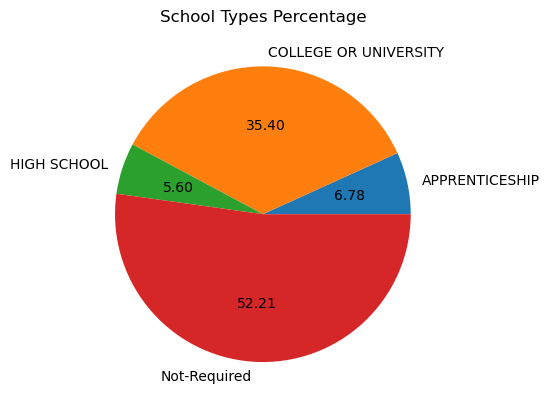

In [57]:
cleaned_bulletins.groupby('School Types').size().plot(kind='pie', autopct='%.2f',ylabel="",title="School Types Percentage")


<Axes: title={'center': 'Exam Type Percentage'}>

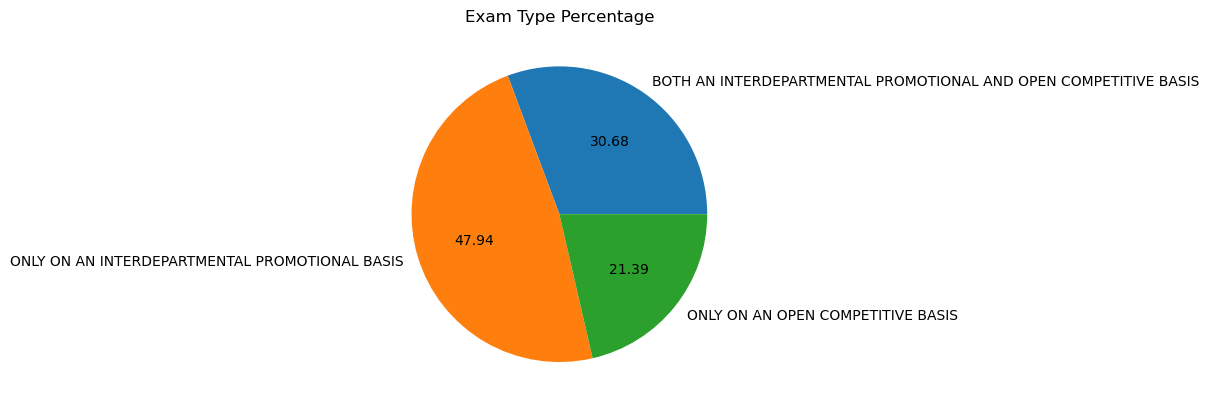

In [58]:
cleaned_bulletins.groupby('Exam Type').size().plot(kind='pie', autopct='%.2f',ylabel="",title="Exam Type Percentage")


<Axes: title={'center': 'Required License Jobs Percentage'}>

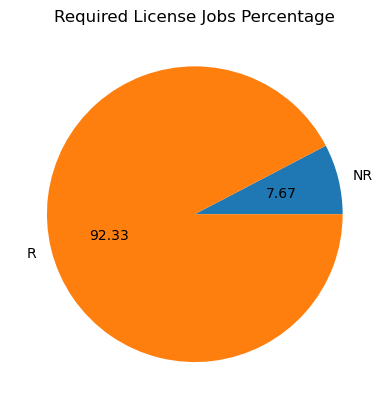

In [59]:
cleaned_bulletins.groupby('Required License').size().plot(kind='pie', autopct='%.2f',ylabel="",title="Required License Jobs Percentage")


<Axes: title={'center': 'Top 30 Experience Job EXP Required Titles'}>

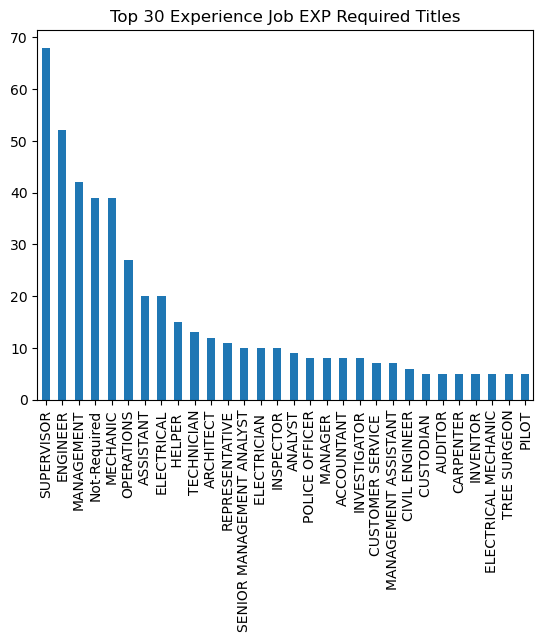

In [60]:
cleaned_bulletins["EXP Job Title"].value_counts().head(30).plot(kind='bar',title='Top 30 Experience Job EXP Required Titles')


<Axes: title={'center': 'Top 30 Educational Major Required'}>

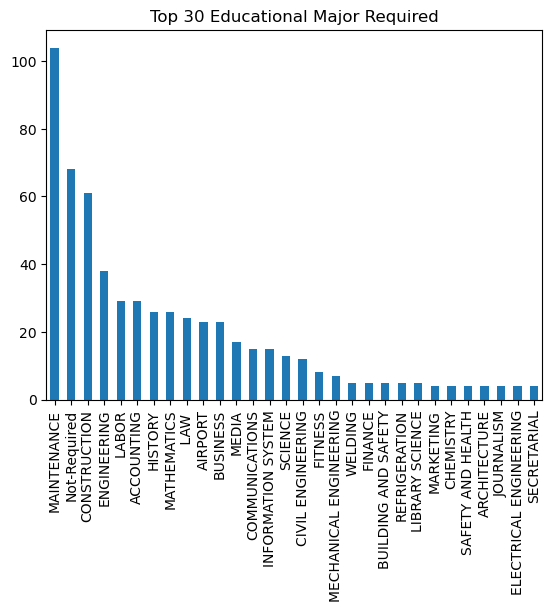

In [61]:
cleaned_bulletins["Educational Major"].value_counts().head(30).plot(kind='bar',title='Top 30 Educational Major Required')


<Axes: title={'center': 'Top 10 Open dates for applying to jobs'}>

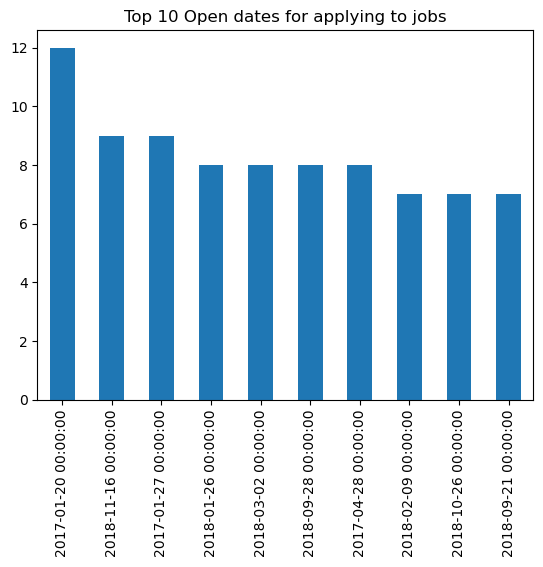

In [62]:
cleaned_bulletins["Open Date"].value_counts().head(10).plot(kind='bar',title='Top 10 Open dates for applying to jobs')


As a summary of figures above, in school types most of bulletins doesn't require a specific type , where the bulletins are require : college  or university is the most common .
INTERDEPARTMENTAL is most required in exams.
Most jobs required a licence with a percentage of 92.64 % 
Top experience job required os SUPERVISOR
Top educational major required is MAINTENANCE.
The most day that jobs applying opens is in 20-01-2017.


Yousef Alomari

